# Oyun Pazarƒ±na √ñn Analiz (RAWG API ile)

## üéØ Ama√ß

Yeni bir oyun geli≈ütirmeden √∂nce pazarƒ± anlamak i√ßin; oyunlarƒ±n **t√ºr**, **platform**, **developer** ve **publisher** kƒ±rƒ±lƒ±mlarƒ±nƒ± ve kalite daƒüƒ±lƒ±mƒ±nƒ± incelemeyi hedefledik.  

Bu kapsamda:

- **Zaman analizi:** Yƒ±llara g√∂re ortalama Metacritic puanƒ± ve 84+ oyunlarƒ±n daƒüƒ±lƒ±mƒ±, pandemi etkisi ve √ºst segmentteki deƒüi≈üim.  
- **T√ºr analizi:** T√ºrlere g√∂re ortalama kalite, oyuncu ilgisi (ratings_count & added), kalite‚Äìilgi dengesini belirleme.  
- **Developer analizi:** En √ßok oyun √ßƒ±karan geli≈ütiriciler, 84+ oyun oranlarƒ±, rekabetten ka√ßƒ±nma stratejisi (√∂zellikle Nintendo‚Äônun baskƒ±nlƒ±ƒüƒ±).  
- **Publisher analizi:** 40% barajƒ±yla segmentasyon (y√ºksek hacim & y√ºksek ba≈üarƒ±, eri≈üilebilir ama daha d√º≈ü√ºk ba≈üarƒ±, prestijli ni≈ü partnerler). Indie geli≈ütirici i√ßin potansiyel partner fƒ±rsatlarƒ±.  
- **Store analizi:** Oyunlarƒ±n yayƒ±nlandƒ±ƒüƒ± maƒüazalarda toplam sayƒ±lar, 84+ oranlarƒ± ve portlama i≈ü y√ºk√º deƒüerlendirmesi. √áƒ±kƒ±≈ü sƒ±rasƒ± i√ßin stratejik √∂neriler.  
- **Ek analizler:** Ratings_count ve added metrikleri √ºzerinden oyunlara olan topluluk ilgisi ve pop√ºlerlik eƒüilimleri.  
- **Unutulmazlar:** Meraklƒ±sƒ± i√ßin, Metacritic 95+ oyunlarƒ±n listelenmesi (34 adet).  

**Genel ama√ß:**  
Sadece kaliteyi (Metacritic) deƒüil, aynƒ± zamanda **oyuncu ilgisini, publisher ve store stratejilerini** dikkate alarak yeni bir oyun i√ßin **doƒüru t√ºr‚Äìplatform‚Äìpartner‚Äìzamanlama** kararlarƒ±nƒ± verebilmek.

## Veri Kaynaƒüƒ±
- **RAWG Video Games Database API**
- Bu √ßalƒ±≈üma, yalnƒ±zca **√∂ƒürenme ve portf√∂y** amacƒ±yla yapƒ±lmƒ±≈ütƒ±r.
- **Veri √ßekim tarihi:** Aƒüustos 2025
## Toplanan Veri
- **Adet:** 5.000 oyun
- **Se√ßim kriteri:** Metacritic puanƒ±na g√∂re **y√ºksekten d√º≈ü√ºƒüe** sƒ±ralanmƒ±≈ü ilk 5.000 kayƒ±t. En d√º≈ü√ºk puan 68'e kadar inmektedir.
- **√áekim stratejisi:**
  1) **Liste u√ß noktasƒ±:** `GET /api/games`  
     Parametreler:  
     - `ordering = -metacritic`  
     - `page_size = 40`  
     - `page = 1..n` (sayfalama ile 5.000 kayda ula≈üƒ±lana kadar)
  2) **Detay zenginle≈ütirme:** Her oyun i√ßin `GET /api/games/{id}`  
     - Bu adƒ±mda geli≈ütirici/yayƒ±ncƒ±/t√ºr/maƒüaza bilgileri eklendi.

## Nihai S√ºtunlar
- `rawg_id`, `name`, `released`, `metacritic_x`, `ratings_count`, `added`, `platforms`, `developers`, `publishers`, `genres`, `stores`

> Notlar:
> - Bazƒ± √ßok eski/bozuk kayƒ±tlarƒ±n detay u√ß noktasƒ± arada **502** d√∂nebildi; bu kayƒ±tlar i√ßin detay alanlarƒ± bo≈ü bƒ±rakƒ±lmƒ±≈ütƒ±r.
> - Analiz ve g√∂rselle≈ütirmeler, bu 5.000 kayƒ±t √ºzerinden ger√ßekle≈ütirilmi≈ütir.

# 0. RAWG API Baƒülantƒ± Testi (Smoke Test)

Bu adƒ±mda API anahtarƒ±nƒ±n √ßalƒ±≈ütƒ±ƒüƒ±nƒ± ve `/api/games` u√ß noktasƒ±na d√ºzg√ºn eri≈üebildiƒüimizi doƒüruladƒ±m.

## Ne yaptƒ±m?
- **Endpoint:** `GET https://api.rawg.io/api/games`
- **Parametreler:**
  - `ordering = -metacritic`  ‚Üí en y√ºksek Metacritic‚Äôten ba≈ülayarak sƒ±rala
  - `page_size = 3`           ‚Üí kotalarƒ± t√ºketmeden hƒ±zlƒ± kontrol (3 kayƒ±t)
  - `page = 1`                ‚Üí ilk sayfa
- **Beklenen √ßƒ±ktƒ±:**
  - `status: 200`
  - JSON √ºst anahtarlarƒ±nda `results` g√∂r√ºn√ºyor
  - ƒ∞lk 3 oyunun `name`, `metacritic`, `ratings_count` deƒüerleri √ßƒ±kƒ±yor

## Neden bu adƒ±m?
- Anahtar ve endpoint eri≈üimi **doƒüru** mu, hƒ±zla g√∂rmek i√ßin
- JSON ≈üemasƒ±nƒ± (√ºst anahtarlar) **kontrol** etmek i√ßin
- B√ºy√ºk √ßekime (5.000 kayƒ±t) ge√ßmeden √∂nce **hƒ±zlƒ± doƒürulama** yapmak i√ßin

In [105]:
import requests

# RAWG API anahtarƒ±nƒ± tanƒ±mlƒ±yoruz
RAWG_KEY = "762732b1ace74b74b4afac1190285ebb"

# √áekmek istediƒüimiz endpoint: Oyun listesi
url = "https://api.rawg.io/api/games"

# Parametreler:
# - key: API anahtarƒ±mƒ±z
# - page_size: Ka√ß oyun gelsin (3 ile test ama√ßlƒ± sƒ±nƒ±rlƒ±yoruz)
# - ordering: "-metacritic" ‚Üí Metacritic puanƒ±na g√∂re azalan sƒ±ralama
params = {
    "key": RAWG_KEY,
    "page_size": 3,       # sadece 3 oyun gelsin
    "ordering": "-metacritic"
}

# API isteƒüini g√∂nderiyoruz (15 sn timeout ile)
r = requests.get(url, params=params, timeout=15)
print("status:", r.status_code)  # HTTP durum kodunu yazdƒ±r (200 ‚Üí ba≈üarƒ±lƒ±)

# JSON verisini alƒ±yoruz
data = r.json()

# Gelen cevaptaki en √ºst seviyedeki anahtarlarƒ± yazdƒ±rƒ±yoruz (√∂r. "results", "count", "next" vb.)
print("√ºst anahtarlar:", list(data.keys()))

# "results" listesindeki oyunlarƒ± tek tek yazdƒ±r
for g in data.get("results", []):
    # Her oyun i√ßin isim, metacritic puanƒ± ve ratings_count (ka√ß ki≈üinin oyladƒ±ƒüƒ±) g√∂sterilir
    print(g.get("name"), "| metacritic:", g.get("metacritic"), "| ratings_count:", g.get("ratings_count")) 

status: 200
√ºst anahtarlar: ['count', 'next', 'previous', 'results', 'seo_title', 'seo_description', 'seo_keywords', 'seo_h1', 'noindex', 'nofollow', 'description', 'filters', 'nofollow_collections']
The Legend of Zelda: Ocarina of Time | metacritic: 99 | ratings_count: 860
Soulcalibur (1998) | metacritic: 98 | ratings_count: 0
Soulcalibur | metacritic: 98 | ratings_count: 84


# 1. Veri Toplama ve Hazƒ±rlƒ±k

## 1.1 Liste U√ß Noktasƒ± (Toplam 10 √ñrnek Oyun)
- ƒ∞lk testte 10 oyun liste endpointinden √ßekildi.
- √áƒ±kan alanlar: `rawg_id, name, released, metacritic_x, ratings_count, added, platforms`
- Bu adƒ±mda sadece **liste yanƒ±tƒ±** kullanƒ±ldƒ± (√∂zet bilgiler).

## 1.2 Detay U√ß Noktasƒ± (Zenginle≈ütirme)
- Her bir oyun i√ßin `GET /api/games/{id}` √ßaƒürƒ±ldƒ±.
- Eklenen alanlar: `developers, publishers, genres, stores`
- B√∂ylece her oyun i√ßin **tam profil** olu≈üturuldu.

## 1.3 Birle≈ütirme
- Liste tablosu ile detay tablosu `rawg_id` √ºzerinden merge edildi.
- Sonu√ß: Her satƒ±r bir oyuna kar≈üƒ±lƒ±k geliyor ve a≈üaƒüƒ±daki s√ºtunlara sahip:
  - `rawg_id`, `name`, `released`, `metacritic_x`, `ratings_count`, `added`,
  - `platforms`, `developers`, `publishers`, `genres`, `stores`

> Bu adƒ±mƒ±n sonunda k√º√ß√ºk bir √∂rnek set (10 oyun) olu≈üturuldu.  
> Sonraki adƒ±mda aynƒ± s√ºreci √∂l√ßeklendirip **5.000 oyuna** geni≈ülettik.

In [13]:
import requests, pandas as pd, time

# 1) ƒ∞lk 10 oyunu liste endpointinden √ßek
BASE = "https://api.rawg.io/api/games"
params = {"key": RAWG_KEY, "ordering": "-metacritic", "page_size": 10, "page": 1}
r = requests.get(BASE, params=params, timeout=20)
r.raise_for_status()
data = r.json()

rows = []
for g in data["results"]:
    rows.append({
        "rawg_id": g["id"],
        "name": g.get("name"),
        "released": g.get("released"),
        "metacritic_x": g.get("metacritic"),   # liste yanƒ±tƒ±ndan gelen metacritic
        "ratings_count": g.get("ratings_count"),
        "added": g.get("added"),
        "platforms": ", ".join([p["platform"]["name"] for p in (g.get("platforms") or [])])
    })

df_list = pd.DataFrame(rows)

# 2) Detaylardan developers, publishers, genres, stores ekle
def fetch_game_details(rawg_id: int, key: str) -> dict:
    url = f"https://api.rawg.io/api/games/{rawg_id}"
    r = requests.get(url, params={"key": key}, timeout=30)
    r.raise_for_status()
    d = r.json()

    def join_names(lst, key="name"):
        return ", ".join([x.get(key) for x in (lst or []) if x.get(key)]) if lst else None

    stores = None
    if d.get("stores"):
        stores = ", ".join([(s.get("store") or {}).get("name") for s in d["stores"] if s.get("store")])

    return {
        "rawg_id": d["id"],
        "developers": join_names(d.get("developers")),
        "publishers": join_names(d.get("publishers")),
        "genres": join_names(d.get("genres")),
        "stores": stores
    }

detail_rows = []
for i, rid in enumerate(df_list["rawg_id"].tolist(), start=1):
    detail_rows.append(fetch_game_details(int(rid), RAWG_KEY))
    if i % 3 == 0 or i == len(df_list):
        print(f"detay alƒ±ndƒ±: {i}/{len(df_list)}")
    time.sleep(0.2)

df_details = pd.DataFrame(detail_rows)

# 3) Birle≈ütir
df_final = df_list.merge(df_details, on="rawg_id", how="left")

# 4) Son tablo
print("Satƒ±r:", len(df_final), "| S√ºtun:", len(df_final.columns))
df_final.head(10)

detay alƒ±ndƒ±: 3/10
detay alƒ±ndƒ±: 6/10
detay alƒ±ndƒ±: 9/10
detay alƒ±ndƒ±: 10/10
Satƒ±r: 10 | S√ºtun: 11


rawg_id                                     name    released  metacritic_x  \
0    25097     The Legend of Zelda: Ocarina of Time  1998-11-21            99   
1   407559                       Soulcalibur (1998)  1998-07-30            98   
2    54751                              Soulcalibur  1998-07-30            98   
3   324997                        Baldur's Gate III  2023-08-03            97   
4    56123                            Metroid Prime  2002-11-17            97   
5    28495                             Perfect Dark  2000-05-22            97   
6    28026                      Super Mario Odyssey  2017-10-27            97   
7    27036                     Super Mario Galaxy 2  2010-05-23            97   
8    27024                       Super Mario Galaxy  2007-11-01            97   
9    22511  The Legend of Zelda: Breath of the Wild  2017-03-03            97   

   ratings_count  added                                    platforms  \
0            860   1834                 Nintendo Switch, Nintendo 64   
1              0      2                          Dreamcast, Xbox 360   
2             84    297  Xbox One, iOS, Xbox 360, Android, Dreamcast   
3            912   4429    macOS, PC, Xbox Series S/X, PlayStation 5   
4            253    638                                Wii, GameCube   
5            175   1038                        Xbox 360, Nintendo 64   
6           1900   3821                              Nintendo Switch   
7            418    986                                   Wii, Wii U   
8            769   1597                                          Wii   
9           3113   6212                       Nintendo Switch, Wii U   

                                          developers  \
0                                           Nintendo   
1                                               None   
2  BANDAI NAMCO Entertainment America, NAMCO, Pro...   
3                                     Larian Studios   
4                                      Retro Studios   
5                                   Rare, 4J Studios   
6                                           Nintendo   
7                                           Nintendo   
8                                           Nintendo   
9                                           Nintendo   

                          publishers                      genres  \
0                           Nintendo      Action, Adventure, RPG   
1  Bandai Namco Entertainment, Namco                    Fighting   
2  Bandai Namco Entertainment, Namco            Action, Fighting   
3                     Larian Studios    Adventure, RPG, Strategy   
4                           Nintendo  Action, Shooter, Adventure   
5            Microsoft Studios, Rare             Action, Shooter   
6                           Nintendo          Arcade, Platformer   
7                           Nintendo                  Platformer   
8                           Nintendo                  Platformer   
9                           Nintendo      Action, Adventure, RPG   

                          stores  
0                 Nintendo Store  
1                           None  
2                 Xbox 360 Store  
3  PlayStation Store, GOG, Steam  
4                           None  
5     Xbox Store, Xbox 360 Store  
6                 Nintendo Store  
7                 Nintendo Store  
8                 Nintendo Store  
9                 Nintendo Store

# 2. B√ºy√ºk √áekim: 5.000 Oyun (Sƒ±ralama = Metacritic ‚Üì)

Bu adƒ±mda √∂rnek √ßalƒ±≈ümayƒ± √∂l√ßekleyip **5.000 oyunu** RAWG API‚Äôden √ßektim.  
Ama√ß, pazarƒ± temsil edecek geni≈ü bir √∂rneklemle t√ºr/platform/developer analizlerini daha saƒülam yapmak.

## 2.1 Y√∂ntem (Liste ‚Üí Detay ‚Üí Birle≈ütir)
1) **Liste u√ß noktasƒ±**: `GET /api/games`  
   - `ordering = -metacritic`  ‚Üí en y√ºksek Metacritic‚Äôten ba≈ülayarak  
   - `page_size = 40`          ‚Üí sayfa ba≈üƒ±na azami kayƒ±t  
   - `page = 1..n`             ‚Üí ‚Äúnext‚Äù olduƒüu s√ºrece sayfalamaya devam  
   - Hedefe (`TARGET = 5000`) ula≈üƒ±nca d√∂ng√º durur.  
   - Liste verisinden alƒ±nan s√ºtunlar:  
     `rawg_id, name, released, metacritic_x, ratings_count, added, platforms`

2) **Detay u√ß noktasƒ±**: `GET /api/games/{id}`  
   - Her oyun i√ßin tekil √ßaƒürƒ± yapƒ±ldƒ±.  
   - Eklenen s√ºtunlar: `developers, publishers, genres, stores`  
   - B√∂ylece her oyun ‚Äúzengin‚Äù hale getirildi.

3) **Birle≈ütirme**  
   - Liste + Detay tablolarƒ± `rawg_id` ile **left merge** edildi.  
   - Nihai tablo (11 s√ºtun):  
     `rawg_id, name, released, metacritic_x, ratings_count, added, platforms, developers, publishers, genres, stores`

## 2.2 Oran Sƒ±nƒ±rlamasƒ± ve Hata Y√∂netimi
- Her isteƒüin arasƒ±na **k√º√ß√ºk bekleme** eklendi (`time.sleep(0.25)`) ‚Üí API‚Äôye nazik davranmak i√ßin.
- Bazƒ± eski/eksik kayƒ±tlarda sunucu **502 (Bad Gateway)** d√∂nebiliyor.  
  - Bu durumda o oyunun detay alanlarƒ± **bo≈ü** bƒ±rakƒ±larak akƒ±≈ü devam etti.
  - (ƒ∞stenirse retry/backoff eklenebilir.)

## 2.3 √áƒ±ktƒ±
- Toplam satƒ±r sayƒ±sƒ±: **‚âà 5.000**
- Kaydedilen dosya: `data/rawg_5000_games.csv` (projede CSV olarak ar≈üivlendi)
- Bu veri, sonraki adƒ±mlarda pazar fotoƒürafƒ±, zaman trendleri, t√ºr/developer/platform analizleri i√ßin kullanƒ±ldƒ±.

> Not: Bu √ßalƒ±≈üma yalnƒ±zca **√∂ƒürenme ve portf√∂y** ama√ßlƒ±dƒ±r; veri kaynaƒüƒ± **RAWG API**‚Äôdir.

In [17]:
import requests, pandas as pd, time, os
from datetime import datetime

RAWG_BASE = "https://api.rawg.io/api/games"
TARGET = 5000          # hedef oyun sayƒ±sƒ±
PAGE_SIZE = 40
ORDERING = "-metacritic"
RATE_SLEEP_LIST = 0.25     # liste √ßaƒürƒ±larƒ± arasƒ± bekleme (sn)
RATE_SLEEP_DETAIL = 0.25   # detay √ßaƒürƒ±larƒ± arasƒ± bekleme (sn)

# ---------- 1) LISTE: temel alanlar ----------
rows = []
page = 1
print(">> Liste √ßekimi ba≈ülƒ±yor...")
while len(rows) < TARGET:
    params = {
        "key": RAWG_KEY,
        "page_size": PAGE_SIZE,
        "page": page,
        "ordering": ORDERING
    }
    r = requests.get(RAWG_BASE, params=params, timeout=30)
    r.raise_for_status()
    data = r.json()

    for g in data.get("results", []):
        rows.append({
            "rawg_id": g.get("id"),
            "name": g.get("name"),
            "released": g.get("released"),
            "metacritic_x": g.get("metacritic"),
            "ratings_count": g.get("ratings_count"),
            "added": g.get("added"),
            "platforms": ", ".join([p["platform"]["name"] for p in (g.get("platforms") or [])])
        })
        if len(rows) >= TARGET:
            break

    if not data.get("next"):
        print(">> Sayfa bitti (next yok).")
        break
    page += 1
    if page % 5 == 0:
        print(f"  - ƒ∞≈ülenen sayfa: {page}, toplanan satƒ±r: {len(rows)}")
    time.sleep(RATE_SLEEP_LIST)

df_list = pd.DataFrame(rows).drop_duplicates(subset=["rawg_id"]).reset_index(drop=True)
print(">> Liste tamamlandƒ±. Satƒ±r:", len(df_list))

# ---------- 2) DETAY: developers, publishers, genres, stores ----------
def fetch_game_details(rawg_id: int, key: str) -> dict:
    url = f"https://api.rawg.io/api/games/{rawg_id}"
    r = requests.get(url, params={"key": key}, timeout=30)
    r.raise_for_status()
    d = r.json()

    def join_names(lst, key="name"):
        return ", ".join([x.get(key) for x in (lst or []) if isinstance(x, dict) and x.get(key)]) if lst else None

    stores = None
    if d.get("stores"):
        stores = ", ".join([(s.get("store") or {}).get("name") for s in d["stores"] if (s.get("store") or {}).get("name")])

    return {
        "rawg_id": d.get("id"),
        "developers": join_names(d.get("developers")),
        "publishers": join_names(d.get("publishers")),
        "genres": join_names(d.get("genres")),
        "stores": stores
    }

detail_rows = []
print(">> Detay √ßekimi ba≈ülƒ±yor...")
for i, rid in enumerate(df_list["rawg_id"].tolist(), start=1):
    try:
        detail_rows.append(fetch_game_details(int(rid), RAWG_KEY))
    except Exception as e:
        # hata olursa bo≈ü kayƒ±t koyup devam edelim
        detail_rows.append({"rawg_id": int(rid), "developers": None, "publishers": None, "genres": None, "stores": None})
        print(f"  ! detay hatasƒ± (id={rid}): {type(e).__name__} - {e}")
    if i % 100 == 0 or i == len(df_list):
        print(f"  - Detay ilerleme: {i}/{len(df_list)}")
    time.sleep(RATE_SLEEP_DETAIL)

df_details = pd.DataFrame(detail_rows)

# ---------- 3) MERGE ----------
df_final = df_list.merge(df_details, on="rawg_id", how="left")
print(">> Birle≈ütirildi. Boyut:", df_final.shape)

# ---------- 4) KAYDET ----------
os.makedirs("data", exist_ok=True)
stamp = datetime.utcnow().strftime("%Y%m%d_%H%M%S")
out_csv = f"data/rawg_{len(df_final)}_games_{stamp}.csv"
df_final.to_csv(out_csv, index=False)
print(">> Kaydedildi:", out_csv)

# ---------- 5) √ñZET ----------
print("\n√ñrnek satƒ±rlar:")
display(df_final.head(5))
print("\nS√ºtunlar:", list(df_final.columns))

>> Liste √ßekimi ba≈ülƒ±yor...
  - ƒ∞≈ülenen sayfa: 5, toplanan satƒ±r: 160
  - ƒ∞≈ülenen sayfa: 10, toplanan satƒ±r: 360
  - ƒ∞≈ülenen sayfa: 15, toplanan satƒ±r: 560
  - ƒ∞≈ülenen sayfa: 20, toplanan satƒ±r: 760
  - ƒ∞≈ülenen sayfa: 25, toplanan satƒ±r: 960
  - ƒ∞≈ülenen sayfa: 30, toplanan satƒ±r: 1160
  - ƒ∞≈ülenen sayfa: 35, toplanan satƒ±r: 1360
  - ƒ∞≈ülenen sayfa: 40, toplanan satƒ±r: 1560
  - ƒ∞≈ülenen sayfa: 45, toplanan satƒ±r: 1760
  - ƒ∞≈ülenen sayfa: 50, toplanan satƒ±r: 1960
  - ƒ∞≈ülenen sayfa: 55, toplanan satƒ±r: 2160
  - ƒ∞≈ülenen sayfa: 60, toplanan satƒ±r: 2360
  - ƒ∞≈ülenen sayfa: 65, toplanan satƒ±r: 2560
  - ƒ∞≈ülenen sayfa: 70, toplanan satƒ±r: 2760
  - ƒ∞≈ülenen sayfa: 75, toplanan satƒ±r: 2960
  - ƒ∞≈ülenen sayfa: 80, toplanan satƒ±r: 3160
  - ƒ∞≈ülenen sayfa: 85, toplanan satƒ±r: 3360
  - ƒ∞≈ülenen sayfa: 90, toplanan satƒ±r: 3560
  - ƒ∞≈ülenen sayfa: 95, toplanan satƒ±r: 3760
  - ƒ∞≈ülenen sayfa: 100, toplanan satƒ±r: 3960
  - ƒ∞≈ülenen sayfa: 105, toplanan

C:\Users\secki\AppData\Local\Temp\ipykernel_15112\2311108919.py:93: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  stamp = datetime.utcnow().strftime("%Y%m%d_%H%M%S")


rawg_id                                  name    released  metacritic_x  \
0    25097  The Legend of Zelda: Ocarina of Time  1998-11-21            99   
1   407559                    Soulcalibur (1998)  1998-07-30            98   
2    54751                           Soulcalibur  1998-07-30            98   
3   324997                     Baldur's Gate III  2023-08-03            97   
4    56123                         Metroid Prime  2002-11-17            97   

   ratings_count  added                                    platforms  \
0            860   1834                 Nintendo Switch, Nintendo 64   
1              0      2                          Dreamcast, Xbox 360   
2             84    297  Xbox One, iOS, Xbox 360, Android, Dreamcast   
3            912   4429    macOS, PC, Xbox Series S/X, PlayStation 5   
4            253    638                                Wii, GameCube   

                                          developers  \
0                                           Nintendo   
1                                               None   
2  BANDAI NAMCO Entertainment America, NAMCO, Pro...   
3                                     Larian Studios   
4                                      Retro Studios   

                          publishers                      genres  \
0                           Nintendo      Action, Adventure, RPG   
1  Bandai Namco Entertainment, Namco                    Fighting   
2  Bandai Namco Entertainment, Namco            Action, Fighting   
3                     Larian Studios    Adventure, RPG, Strategy   
4                           Nintendo  Action, Shooter, Adventure   

                          stores  
0                 Nintendo Store  
1                           None  
2                 Xbox 360 Store  
3  PlayStation Store, GOG, Steam  
4                           None


S√ºtunlar: ['rawg_id', 'name', 'released', 'metacritic_x', 'ratings_count', 'added', 'platforms', 'developers', 'publishers', 'genres', 'stores']


# 2.4 Veri Kaydetme ve Temizlik

## CSV Olarak Kaydetme
- Nihai `df_final` tablosu **CSV** formatƒ±nda diske yazƒ±ldƒ±:  
  `rawg_5000_games.csv`
- Dosya Jupyter √ºzerinden indirilebilir link ile eri≈üime a√ßƒ±ldƒ± (`FileLink`).

## Tarih Formatƒ± D√ºzenleme
- `released` s√ºtunu bazƒ± satƒ±rlarda string olarak gelmi≈üti.  
- Pandas `to_datetime(..., errors="coerce")` ile **datetime** tipine d√∂n√º≈üt√ºr√ºld√º.  
  - Ge√ßersiz/bo≈ü deƒüerler `NaT` olarak i≈üaretlendi.
- Bu adƒ±m, zaman serisi analizlerinde (`.dt.year` vb.) kullanƒ±labilmesi i√ßin gerekliydi.

> Bu adƒ±mƒ±n sonunda veri seti hem **ar≈üivlenmi≈ü**, hem de **analizlere hazƒ±r** hale getirilmi≈ü oldu.

In [18]:
df_final.to_csv("rawg_5000_games.csv", index=False)

In [19]:
from IPython.display import FileLink
FileLink("rawg_5000_games.csv")

C:\Windows\System32\rawg_5000_games.csv

In [21]:
df_final["released"] = pd.to_datetime(df_final["released"], errors="coerce")

# 3. Zaman Trendleri ‚Äî Yƒ±llara G√∂re Ortalama Metacritic

**Neden?**  
Veri √ßekim kriterimiz Metacritic olduƒüundan, ilk olarak yƒ±llar bazƒ±nda ortalama puanƒ±n nasƒ±l seyrettiƒüine bakƒ±yoruz.  
Bu analiz, ‚Äúyeni bir oyun bug√ºn piyasaya √ßƒ±ktƒ±ƒüƒ±nda piyasanƒ±n kalite √ßƒ±tasƒ± hangi seviyede?‚Äù sorusuna temel bir referans verir.

**Y√∂ntem (√∂zet):**
- `released` tarihini `datetime` tipine d√∂n√º≈üt√ºrd√ºk (`errors="coerce"`).
- Her oyun i√ßin `year = released.dt.year` √ßƒ±karƒ±ldƒ±.
- Yƒ±la g√∂re gruplama yapƒ±larak `metacritic_x` deƒüerlerinin ortalamasƒ± alƒ±ndƒ±.

**Grafik yorumu (beklenen i√ßg√∂r√ºler):**
- Yƒ±llar boyunca ortalama Metacritic‚Äôin artƒ±≈ü/azalƒ±≈ü trendi.
- Tepe/√ß√∂k√º≈ü yƒ±llarƒ± (√∂r. nesil ge√ßi≈üleri, platform patlamalarƒ±).
- Trendteki kƒ±rƒ±lmalarƒ±n (√∂r. 2007‚Äì2012 konsol ge√ßi≈üleri, pandemi d√∂nemi) olasƒ± etkileri.

> Not: `released` deƒüeri eksik olanlar dƒ±≈üarƒ±da bƒ±rakƒ±lmƒ±≈ütƒ±r. Bu nedenle √ßok eski veya tarih bilgisi eksik bazƒ± kayƒ±tlar grafiƒüe yansƒ±mayabilir.


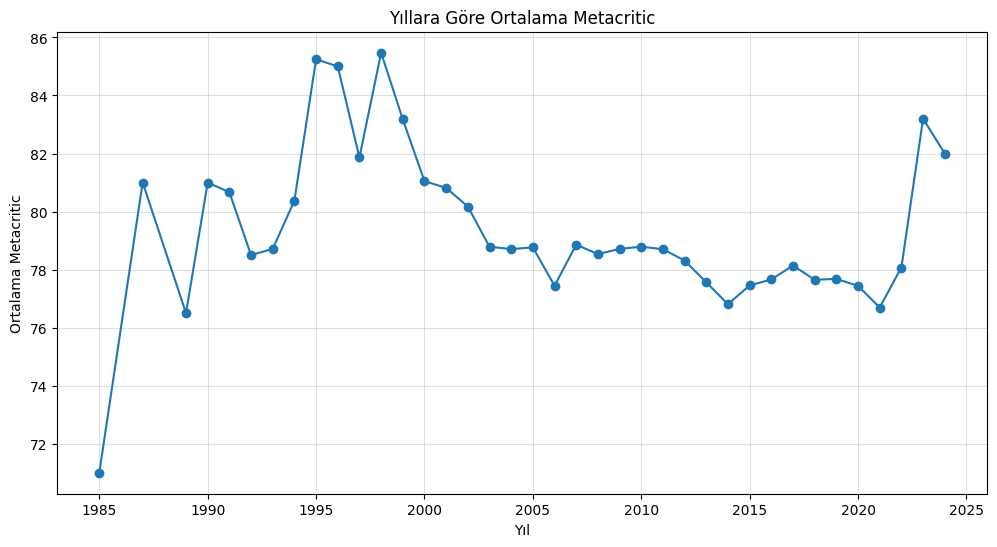

In [109]:
# "released" kolonunu datetime formatƒ±na √ßeviriyoruz
# errors="coerce" ‚Üí hatalƒ± tarihleri NaT (eksik deƒüer) yapar
df_final["released"] = pd.to_datetime(df_final["released"], errors="coerce")

import matplotlib.pyplot as plt

# Yƒ±llara g√∂re ortalama Metacritic hesaplama
df_year = (
    df_final
    .dropna(subset=["released","metacritic_x"])   # eksik tarih veya metacritic olan satƒ±rlarƒ± at
    .assign(year=lambda d: d["released"].dt.year) # tarih kolonundan sadece yƒ±lƒ± √ßƒ±kar
    .groupby("year", as_index=False)["metacritic_x"].mean()  # yƒ±l bazƒ±nda ortalama metacritic al
)

# √áizgi grafik √ßizimi
plt.figure(figsize=(12,6))  # grafik boyutu
plt.plot(df_year["year"], df_year["metacritic_x"], marker="o")  # yƒ±llar x ekseni, ortalama metacritic y ekseni
plt.title("Yƒ±llara G√∂re Ortalama Metacritic")  # ba≈ülƒ±k
plt.xlabel("Yƒ±l")                             # x ekseni etiketi
plt.ylabel("Ortalama Metacritic")             # y ekseni etiketi
plt.grid(True, alpha=0.4)                     # grid √ßizgileri (alpha=0.4 ‚Üí ≈üeffaflƒ±k)
plt.show()                                    # grafiƒüi g√∂ster

### Yorum ‚Äî Yƒ±llara G√∂re Ortalama Metacritic

Grafikte 1985‚Äì2024 arasƒ±ndaki oyunlarƒ±n ortalama Metacritic skorlarƒ± yer alƒ±yor.  

**√ñne √ßƒ±kan bulgular:**
- **1990‚Äôlarƒ±n ortasƒ± ‚Äì 2000 ba≈üƒ±:** Oyunlarƒ±n ortalama Metacritic deƒüerleri olduk√ßa y√ºksek (84‚Äì86 bandƒ±). Bu d√∂nem, konsol pazarƒ±nƒ±n geni≈ülediƒüi ve ‚Äúefsane‚Äù oyunlarƒ±n √ßƒ±ktƒ±ƒüƒ± bir d√∂nem.
- **2005 sonrasƒ±:** Ortalama skorlar 78‚Äì80 bandƒ±na oturmu≈ü durumda. Yani oyunlarƒ±n genel kalitesi **daha dengeli ve ortalama seviyeye** yakƒ±n.
- **2015‚Äì2021:** Uzun bir s√ºre boyunca neredeyse yatay seyir var (77‚Äì79 civarƒ±). Bu da oyun sekt√∂r√ºnde kalite √ßƒ±tasƒ±nƒ±n sabitlendiƒüini g√∂steriyor.
- **2023 sonrasƒ± ani y√ºkseli≈ü:** Ortalama skorlar yeniden 82‚Äì83 seviyelerine √ßƒ±kƒ±yor.  
  Bunun √∂nemli bir nedeni, **2020‚Äôde pandemi s√ºrecinde geli≈ütirilip ertelenen b√ºy√ºk oyunlarƒ±n 2023 itibarƒ±yla √ßƒ±kmaya ba≈ülamasƒ±** olabilir. Geli≈ütirme s√ºresinin uzamasƒ± kaliteyi artƒ±rmƒ±≈ü olabilir.  
  Ancak veri setimiz **Metacritic sƒ±ralamasƒ±na g√∂re se√ßildiƒüi i√ßin** burada hafif yanlƒ±lƒ±k (bias) olabileceƒüini unutmamak gerek.

**Sonu√ß:**  
Yeni bir oyun geli≈ütirmek isteyen biri i√ßin bu grafik ≈üu mesajƒ± veriyor:  
- Sekt√∂rde genel kalite 2005‚Äôten beri **78‚Äì80 bandƒ±nda sabitlenmi≈ü**.  
- Son d√∂nemde ortalama bir iyile≈üme olsa da, ‚Äúy√ºksek Metacritic‚Äù almak i√ßin hala **84+ barajƒ±** olduk√ßa zorlayƒ±cƒ±.  
- Yeni oyunun, rekabet√ßi olabilmesi i√ßin en azƒ±ndan **84 √ºzeri** hedeflemesi mantƒ±klƒ±.

## 3.1 Yƒ±llara G√∂re ‚ÄúKaliteli Oyun‚Äù Sayƒ±sƒ± (Metacritic ‚â• 84)

**Neden?**  
Top-5000 verisi Metacritic‚Äôe g√∂re se√ßildiƒüi i√ßin, ‚Äúyƒ±llara g√∂re toplam oyun sayƒ±sƒ±‚Äù t√ºm pazarƒ± temsil etmeyebilir. Bu y√ºzden, barajƒ± **84** olarak belirleyip her yƒ±l **ka√ß oyunun 84+** aldƒ±ƒüƒ±nƒ± sayƒ±yoruz. B√∂ylece d√∂nemler arasƒ± **y√ºksek kalite yoƒüunluƒüunu** daha adil kar≈üƒ±la≈ütƒ±rƒ±rƒ±z.

**Y√∂ntem (√∂zet):**
- `released ‚Üí year` √ßƒ±karƒ±ldƒ± (eksik tarihli kayƒ±tlar dƒ±≈üarƒ±da).
- `metacritic_x ‚â• 84` filtresi uygulandƒ±.
- Yƒ±la g√∂re grup + adet.
- Grafikte her barƒ±n √ºst√ºne adet yazƒ±ldƒ±.

> Not: Veri k√ºmesi ‚Äúen iyi 5000‚Äùden olu≈ütuƒüu i√ßin bu metrik **√ºst kalite kesitindeki yoƒüunluƒüu** g√∂sterir; t√ºm pazar hacmini deƒüil.

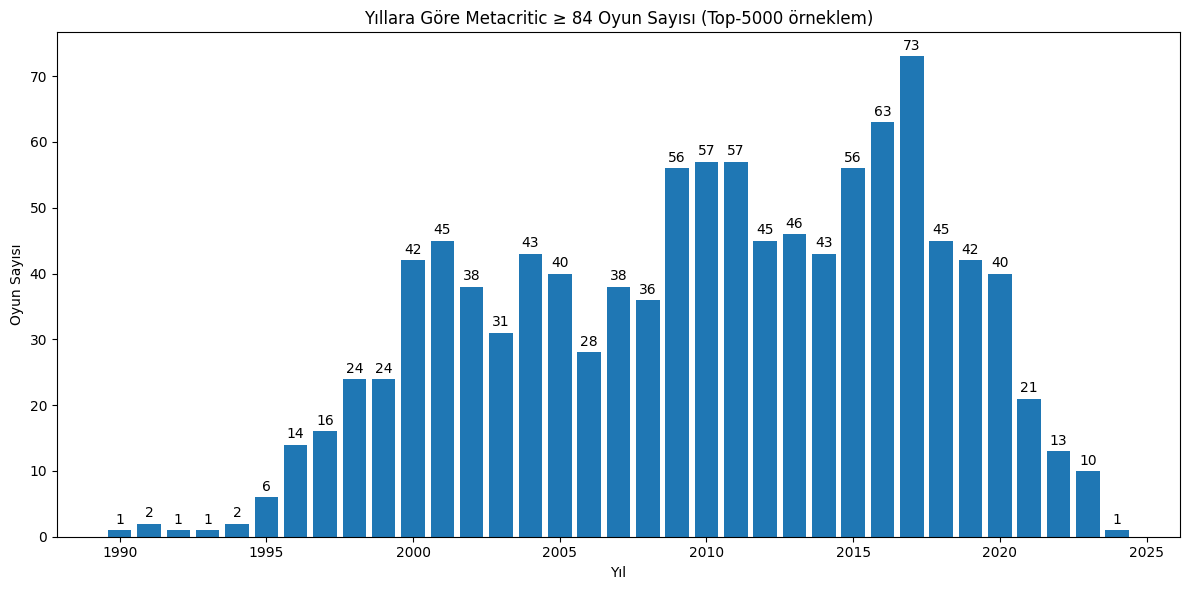

In [110]:
import matplotlib.pyplot as plt

THRESH = 84  #  Baraj deƒüerimiz (Metacritic 84 ve √ºzeri oyunlarƒ± alacaƒüƒ±z)

# Veri hazƒ±rlƒ±ƒüƒ±
df_ge = (
    df_final
    .dropna(subset=["released","metacritic_x"])     # ge√ßersiz tarih veya metacritic verilerini at
    .assign(year=lambda d: d["released"].dt.year)   # yƒ±l bilgisi ekle
    .query("metacritic_x >= @THRESH")               # sadece 84+ oyunlarƒ± filtrele
    .groupby("year", as_index=False)                # yƒ±l bazƒ±nda grupla
    .size()                                         # oyun sayƒ±sƒ±nƒ± hesapla
    .rename(columns={"size": f"count_ge_{THRESH}"}) # kolon adƒ±nƒ± anlamlƒ± yap (count_ge_84)
)

# √áubuk grafik √ßizimi
plt.figure(figsize=(12,6))
bars = plt.bar(df_ge["year"], df_ge[f"count_ge_{THRESH}"])   # yƒ±l ‚Üí x, oyun sayƒ±sƒ± ‚Üí y
plt.title(f"Yƒ±llara G√∂re Metacritic ‚â• {THRESH} Oyun Sayƒ±sƒ± (Top-5000 √∂rneklem)")
plt.xlabel("Yƒ±l")
plt.ylabel("Oyun Sayƒ±sƒ±")

# √áubuklarƒ±n √ºst√ºne deƒüer etiketleri ekle
for b, v in zip(bars, df_ge[f"count_ge_{THRESH}"]):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.5, str(int(v)),
             ha="center", va="bottom")

plt.tight_layout()   # kenarlarda ta≈üma olmasƒ±n
plt.show()           # grafiƒüi g√∂ster


### Yorum ‚Äî Yƒ±llara G√∂re Metacritic ‚â• 84 Oyun Sayƒ±sƒ±

Grafik, **her yƒ±l Metacritic puanƒ± 84 ve √ºzeri olan oyunlarƒ±n sayƒ±sƒ±nƒ±** g√∂stermektedir (top-5000 √∂rneklem √ºzerinden).

**√ñne √ßƒ±kan bulgular:**
- **2000‚Äì2010 d√∂nemi:** Her yƒ±l ortalama 40‚Äì50 arasƒ± y√ºksek puanlƒ± oyun √ßƒ±kmƒ±≈ü; bu d√∂nem kaliteli oyun √ºretiminin en istikrarlƒ± olduƒüu yƒ±llar.
- **2016‚Äì2017 zirvesi:** 2016‚Äôda 63, 2017‚Äôde 73 oyun 84+ almƒ±≈ü. Bu, veri setindeki en yoƒüun y√ºksek kalite d√∂nemidir.
- **2018 sonrasƒ± d√º≈ü√º≈ü:** 2018‚Äôden itibaren sayƒ± belirgin ≈üekilde azalmƒ±≈ü; 2021‚Äì2023‚Äôte sert d√º≈ü√º≈ü var (2023‚Äôte sadece 10 oyun).
- **Olasƒ± neden:** 2020‚Äôde ba≈ülayan pandemi s√ºrecinde bir√ßok proje ertelendi, bu da 2021‚Äì2023 √ßƒ±kƒ±≈ülarƒ±nƒ± azalttƒ±.  
  √ñn√ºm√ºzdeki birka√ß yƒ±lda 2020‚Äì2023‚Äôde geli≈ütirilen projelerin √ßƒ±kmasƒ±yla yeniden artƒ±≈ü g√∂r√ºlebilir.

**Sonu√ß:**  
Sekt√∂r, **2010‚Äôlarƒ±n ortasƒ±nda kalite a√ßƒ±sƒ±ndan zirveye ula≈ümƒ±≈ü**; son yƒ±llarda y√ºksek puanlƒ± oyun sayƒ±sƒ± azalmƒ±≈ü durumda.  
Yeni geli≈ütirilecek bir oyun i√ßin bu, pazarda ‚Äúbo≈üluk‚Äù da yaratabilir; kaliteli bir √ßƒ±kƒ±≈ü rekabetin az olduƒüu d√∂neme denk gelebilir.

### Yorum ‚Äî Pandemi Etkisi

Pandeminin etkisinin, oyunlarƒ±n **ortalama Metacritic puanlarƒ±nƒ± arttƒ±rdƒ±ƒüƒ±nƒ±** fark etmi≈ütik.  
Fakat aynƒ± d√∂nemde 84 olarak belirlediƒüimiz baraj √ºzerinden yaptƒ±ƒüƒ±mƒ±z analizde, **√ºst d√ºzey segmentteki oyun sayƒ±sƒ±nƒ±n d√º≈üt√ºƒü√ºn√º** g√∂r√ºyoruz.  

Bu sonu√ß bize ≈üunu g√∂steriyor:  
- Genel olarak sekt√∂rde bir **kalite artƒ±≈üƒ±** mevcut,  
- Ancak **√ºst segmentte yoƒüunla≈üma** azalmƒ±≈ü durumda.  
- Yani standart sapma daralmƒ±≈ü, oyunlar daha √ßok **orta‚Äì√ºst kalite bandƒ±nda** toplanmƒ±≈ü.  

Dolayƒ±sƒ±yla **84+ bir puan alan oyun, g√ºn√ºm√ºz piyasasƒ±nda daha √ßok dikkat √ßekecektir.**  
Bu da, √∂nceki analizimizde belirlediƒüimiz 84 barajƒ±nƒ± mantƒ±klƒ± bir se√ßim olarak g√º√ßlendiriyor.

### Not ‚Äî 2024 ve Sonrasƒ±

Grafikte 2024 yƒ±lƒ± yalnƒ±zca **1 oyun** ile g√∂r√ºn√ºyor, 2025 i√ßin ise hi√ß veri yok.  
Bunun nedeni veri setinin **2025 Aƒüustos ayƒ±nda √ßekilmi≈ü** olmasƒ±dƒ±r.  
- 2024 yƒ±lƒ± hen√ºz tamamlanmadƒ±ƒüƒ± i√ßin √ßoƒüu oyunun √ßƒ±kƒ±≈üƒ± ve Metacritic skoru hen√ºz i≈ülenmemi≈ütir.  
- 2025 i√ßin listelenen oyunlar olsa bile hen√ºz skorlanmadƒ±ƒüƒ±ndan bu analizde yer almaz.  

Dolayƒ±sƒ±yla 2024 ve sonrasƒ± verileri **erken yƒ±l etkisi** nedeniyle g√ºvenilir deƒüildir.  
Analizlerimizi yorumlarken 2023 ve √∂ncesine odaklanmak daha doƒüru olacaktƒ±r.

### T√ºr Analizine Ge√ßi≈ü

√ñnceki adƒ±mlarƒ±mƒ±zda hedeflediƒüimiz **Metacritic barajƒ±nƒ± (84+)** belirlemi≈ü olduk.  
≈ûimdi ise se√ßim i√ßin oyun t√ºrlerine odaklanƒ±yoruz.  
Ama√ß, hangi t√ºrlerin genel olarak daha y√ºksek ortalama puanlara ula≈ütƒ±ƒüƒ±nƒ± ve hangi t√ºrlerde 84+ segmentine girme olasƒ±lƒ±ƒüƒ±nƒ±n daha y√ºksek olduƒüunu g√∂rmek.

## 3.2 T√ºr Analizi ‚Äî Ortalama Kalite ve √úst D√ºzey Potansiyel

Oyun geli≈ütirmede en stratejik kararlardan biri, hangi **t√ºr** √ºzerine odaklanƒ±lacaƒüƒ±dƒ±r.  
Bu y√ºzden veri setimizdeki t√ºrleri (genre) analiz ederek:  

- T√ºrlerin **ortalama Metacritic puanlarƒ±nƒ±** (genel kalite d√ºzeyi),  
- T√ºrlerde **84+ segmentine girme oranlarƒ±nƒ±** (√ºst d√ºzey oyun √ßƒ±karma potansiyeli),  

kar≈üƒ±la≈ütƒ±rƒ±yoruz.  

Ama√ß: **hangi t√ºrlerin y√ºksek ortalama kalite sunduƒüunu ve hangi t√ºrlerde √ºst d√ºzey ba≈üarƒ± ≈üansƒ±nƒ±n daha y√ºksek olduƒüunu ortaya koymak.**

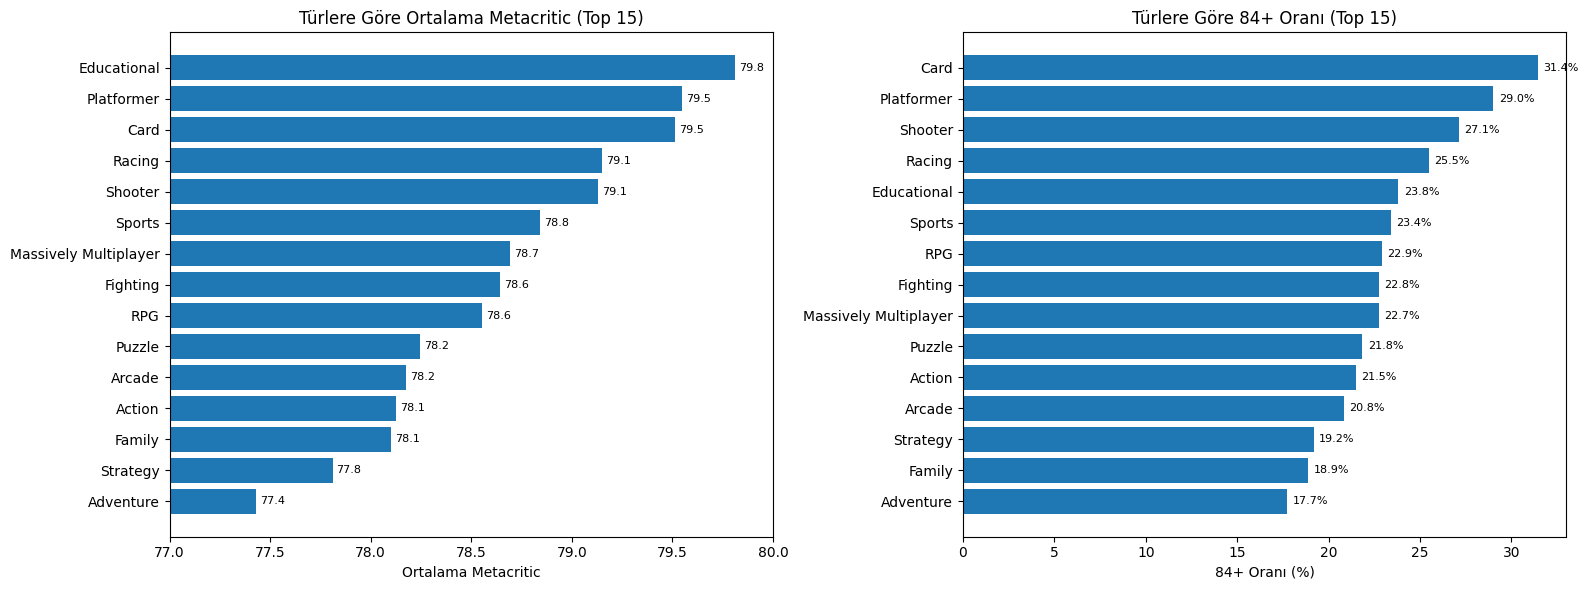

In [120]:
# 1 satƒ±r 2 kolon (yan yana grafikler) olacak ≈üekilde fig√ºr hazƒ±rlƒ±yoruz
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Ortalama Metacritic ---
# T√ºrlere g√∂re ortalama Metacritic puanƒ±nƒ± en y√ºksekten sƒ±ralayƒ±p ilk 15'i alƒ±yoruz
top_mean = agg.sort_values("mean_mc", ascending=False).head(15)

# Yatay bar grafiƒüi (barh) √ßizdiriyoruz, ters √ßevirerek √ºstten alta doƒüru sƒ±ralama yapƒ±yoruz
bars = axes[0].barh(top_mean["genre"][::-1], top_mean["mean_mc"][::-1])

# Grafik ba≈ülƒ±ƒüƒ±, eksen adƒ± ve sƒ±nƒ±rlarƒ±
axes[0].set_title("T√ºrlere G√∂re Ortalama Metacritic (Top 15)")
axes[0].set_xlabel("Ortalama Metacritic")
axes[0].set_xlim(77, 80)  # daha net g√∂r√ºn√ºm i√ßin 77‚Äì80 aralƒ±ƒüƒ± zoom

# Barlarƒ±n √ºzerine sayƒ±sal deƒüer (ortalama Metacritic) yazdƒ±rƒ±yoruz
for b in bars:
    axes[0].text(b.get_width()+0.02, b.get_y()+b.get_height()/2,
                 f"{b.get_width():.1f}", va="center", fontsize=8)

# --- 84+ Oranƒ± ---
# T√ºrlere g√∂re 84 ve √ºzeri puan alan oyunlarƒ±n oranƒ±nƒ± hesaplayƒ±p en y√ºksek ilk 15'i alƒ±yoruz
top_rate = agg.sort_values("rate_ge84", ascending=False).head(15)

# Yatay bar grafiƒüi (barh) √ßizdiriyoruz
bars = axes[1].barh(top_rate["genre"][::-1], top_rate["rate_ge84"][::-1])

# Grafik ba≈ülƒ±ƒüƒ± ve eksen etiketi
axes[1].set_title("T√ºrlere G√∂re 84+ Oranƒ± (Top 15)")
axes[1].set_xlabel("84+ Oranƒ± (%)")

# Barlarƒ±n √ºzerine oran deƒüerini y√ºzde formatƒ±nda yazdƒ±rƒ±yoruz
for b in bars:
    axes[1].text(b.get_width()+0.3, b.get_y()+b.get_height()/2,
                 f"{b.get_width():.1f}%", va="center", fontsize=8)

# Grafiklerin ta≈ümamasƒ± ve hizalƒ± g√∂r√ºnmesi i√ßin
plt.tight_layout()
plt.show()

### Yorum ‚Äî T√ºrlere G√∂re Metacritic Analizi

ƒ∞lk grafikte (solda) t√ºrlerin **ortalama Metacritic puanlarƒ±** kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ütƒ±r.  
Burada √∂zellikle *Educational, Platformer, Card* t√ºrlerinin ortalamada 79+ puana ula≈üarak diƒüer t√ºrlere kƒ±yasla √∂ne √ßƒ±ktƒ±ƒüƒ±nƒ± g√∂r√ºyoruz.  
Ancak farklar dar bir aralƒ±kta (77‚Äì80) toplandƒ±ƒüƒ± i√ßin genel kalite t√ºrler arasƒ±nda olduk√ßa dengeli.  

ƒ∞kinci grafikte (saƒüda) ise t√ºrlerin **84+ segmentine girme oranƒ±** g√∂sterilmektedir.  
Bu metrik, bir t√ºr√ºn ‚Äú√ºst d√ºzey‚Äù oyun √ßƒ±karma potansiyelini daha iyi yansƒ±tƒ±r.  
- *Card (%31), Platformer (%29), Shooter (%27)* t√ºrleri, oyunlarƒ±n yakla≈üƒ±k √º√ßte birini 84+ seviyesine √ßƒ±karabilmi≈ü.  
- Buna kar≈üƒ±lƒ±k *Adventure (%17), Family (%18.9)* gibi t√ºrlerde √ºst d√ºzeye √ßƒ±kabilme oranƒ± daha d√º≈ü√ºkt√ºr.  

**Sonu√ß:**  
- Ortalama puan a√ßƒ±sƒ±ndan t√ºrler birbirine yakƒ±n olsa da, **84+ oranƒ±** y√ºksek olan t√ºrler (Card, Platformer, Shooter) yeni bir oyun geli≈ütirmek i√ßin daha stratejik fƒ±rsatlar sunabilir.  
- Bu analiz, sadece ‚Äúortalama kaliteye‚Äù deƒüil, aynƒ± zamanda ‚Äú√ºst d√ºzey ba≈üarƒ±ya ula≈üma olasƒ±lƒ±ƒüƒ±na‚Äù da bakmamƒ±z gerektiƒüini ortaya koyuyor.


## 3.3 T√ºr Analizi ‚Äî Etkile≈üim / Pop√ºlerlik (ratings_count & added)

Metacritic kaliteyi g√∂sterirken, **oyuncu ilgisini** iki RAWG metriƒüiyle √∂l√ß√ºyoruz:
- **`ratings_count`**: Ka√ß ki≈üi oy vermi≈ü ‚Üí *etkile≈üim yoƒüunluƒüu*  
- **`added`**: Ka√ß ki≈üi koleksiyonuna/istek listesine eklemi≈ü ‚Üí *pop√ºlerlik/ilgi*

**Y√∂ntem:**
- Oyunlarƒ± t√ºr bazƒ±nda ‚Äúexplode‚Äù edip her t√ºr i√ßin **medyan** `ratings_count` ve **medyan** `added` hesaplƒ±yoruz (a≈üƒ±rƒ± u√ßlardan etkilenmemek i√ßin medyan).
- ƒ∞lk 15 t√ºr√º iki metrik i√ßin ayrƒ± ayrƒ± listeliyoruz.

> Not: T√ºrlerin √∂rnek sayƒ±larƒ± e≈üit deƒüildir; ‚Äú√ßok az oyunu‚Äù olan t√ºrler bazen ≈üi≈üebilir. Bu y√ºzden medyan kullandƒ±k.


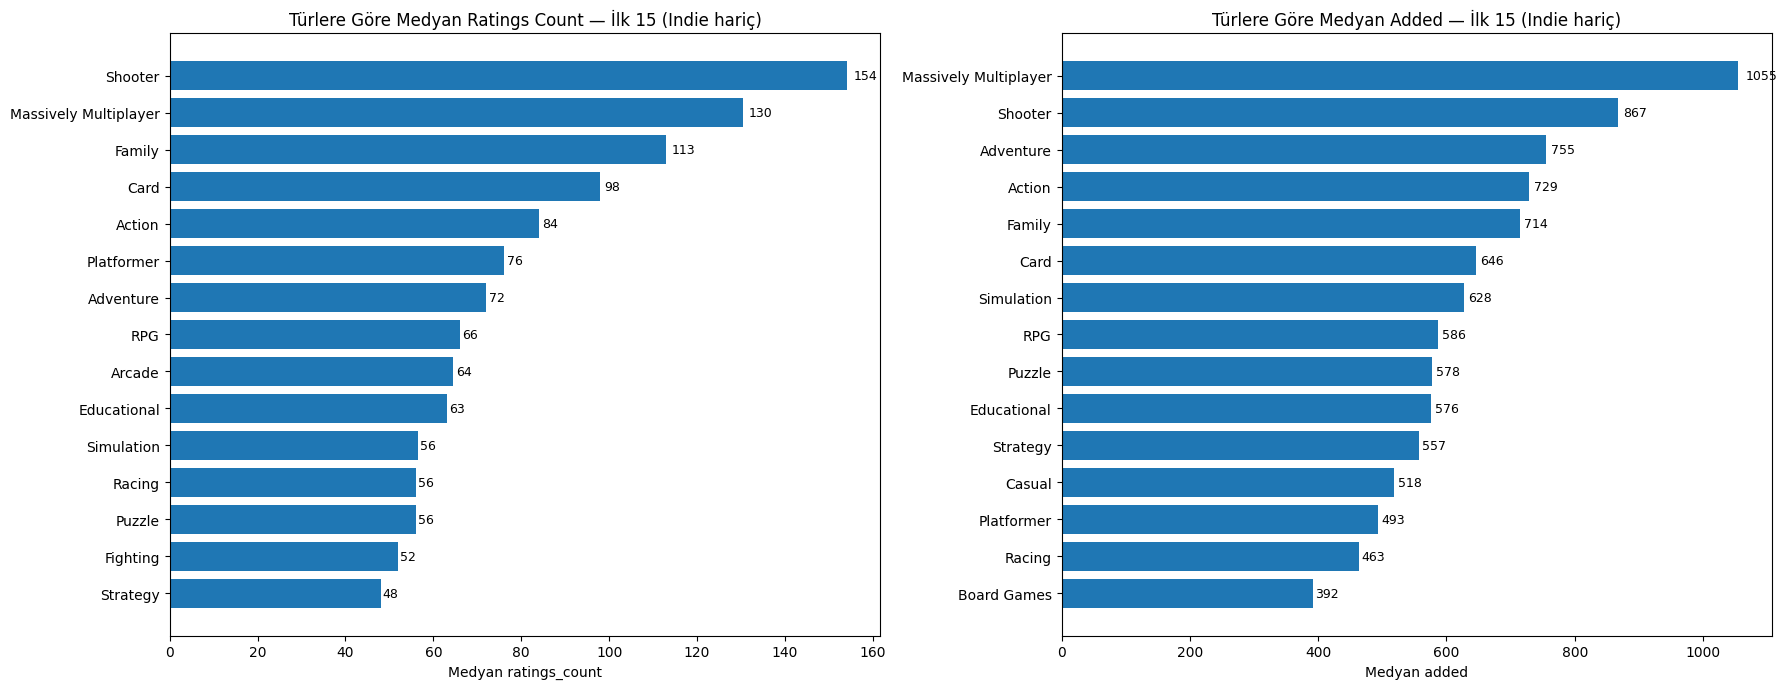

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Hari√ß tutulacak t√ºrler
EXCLUDE_GENRES = {"Indie"}   # Oyun tarzlarƒ±na g√∂re baktƒ±ƒüƒ±mƒ±z i√ßin, indie olan bir oyun mesala metroidvania da olabildiƒüi i√ßin indie yi t√ºr olarak almƒ±yoruz.

# genres + ilgi metrikleri i√ßin uzun form (Indie hari√ß)
rows = []
src = df_final.dropna(subset=["genres"])
for _, row in src.iterrows():
    g_list = [g.strip() for g in row["genres"].split(",") if g.strip()]
    rc = row.get("ratings_count")
    ad = row.get("added")
    for g in g_list:
        if g in EXCLUDE_GENRES:
            continue
        rows.append({
            "genre": g,
            "ratings_count": float(rc) if pd.notna(rc) else None,
            "added": float(ad) if pd.notna(ad) else None
        })

gpop = pd.DataFrame(rows)

# T√ºr bazƒ±nda medyan ilgi metrikleri (ve √∂rnek sayƒ±sƒ±)
agg_pop = (
    gpop.groupby("genre", as_index=False)
        .agg(n=("ratings_count","size"),
             median_ratings=("ratings_count","median"),
             median_added=("added","median"))
        .fillna(0)
)

top_ratings = agg_pop.sort_values("median_ratings", ascending=False).head(15)
top_added   = agg_pop.sort_values("median_added",   ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sol: ratings_count (medyan)
bars1 = axes[0].barh(top_ratings["genre"][::-1], top_ratings["median_ratings"][::-1])
axes[0].set_title("T√ºrlere G√∂re Medyan Ratings Count ‚Äî ƒ∞lk 15 (Indie hari√ß)")
axes[0].set_xlabel("Medyan ratings_count")
for b in bars1:
    axes[0].text(b.get_width()*1.01, b.get_y()+b.get_height()/2,
                 f"{b.get_width():.0f}", va="center", fontsize=9)

# Saƒü: added (medyan)
bars2 = axes[1].barh(top_added["genre"][::-1], top_added["median_added"][::-1])
axes[1].set_title("T√ºrlere G√∂re Medyan Added ‚Äî ƒ∞lk 15 (Indie hari√ß)")
axes[1].set_xlabel("Medyan added")
for b in bars2:
    axes[1].text(b.get_width()*1.01, b.get_y()+b.get_height()/2,
                 f"{b.get_width():.0f}", va="center", fontsize=9)

plt.tight_layout()
plt.show()

### Yorum ‚Äî T√ºrlerin Ba≈üarƒ± ve ƒ∞lgi Dengesi

Analizlerimizi kar≈üƒ±la≈ütƒ±rdƒ±ƒüƒ±mƒ±zda, bazƒ± t√ºrlerin **y√ºksek kalite (Metacritic puanƒ±)** getirdiƒüini, bazƒ±larƒ±nƒ±n ise daha √ßok **oyuncu ilgisi** (ratings count ve added sayƒ±sƒ±) √ßektiƒüini g√∂r√ºyoruz.  

- **Platformer & Educational:**  
  Metacritic‚Äôte y√ºksek ba≈üarƒ± elde etseler de (ortalama puanlarda √ºst sƒ±ralar), oyuncu ilgisi tarafƒ±nda geride kalƒ±yorlar.  
  ‚Üí Yani **ele≈ütirmenlerin sevdiƒüi ama kitleye ula≈ümakta zorlanan t√ºrler**.

- **Shooter & Card:**  
  Hem Metacritic puanlarƒ±nda hem de oyuncu ilgisinde √ºst sƒ±ralarda.  
  ‚Üí Bu t√ºrler, **hem ba≈üarƒ± hem pop√ºlerlik** a√ßƒ±sƒ±ndan g√º√ßl√º adaylar.

- **Massively Multiplayer:**  
  Metacritic ba≈üarƒ±sƒ± orta seviyede, ancak **en y√ºksek oyuncu ilgisini (added/ratings)** bu t√ºr g√∂r√ºyor.  
  ‚Üí Yani oyuncular tarafƒ±ndan √ßok talep g√∂r√ºyor ama kalite √ßƒ±tasƒ±nƒ± yakalamak zor.  
  ‚Üí Potansiyeli b√ºy√ºk, ancak rekabeti de yoƒüun.

- **Family & Action:**  
  Oyuncu ilgisi y√ºksek, Metacritic ba≈üarƒ±sƒ± ise ortalama d√ºzeyde.  
  ‚Üí Bu t√ºrler **kitlelere ula≈ümada g√º√ßl√º ama ele≈ütirmenlerden y√ºksek not almak daha zor** olabilir.

**√áƒ±karƒ±m:**  
- Eƒüer **y√ºksek puan hedefi** (84+ barajƒ±) √∂nceliƒüimizse: *Card, Shooter, Platformer*.  
- Eƒüer **oyuncu ilgisi ve yaygƒ±nlƒ±k** √∂nceliƒüimizse: *Shooter, Massively Multiplayer, Action*.  
- Dengeli bir strateji i√ßin: **Shooter** t√ºr√º √∂ne √ßƒ±kƒ±yor √ß√ºnk√º her iki metriƒüi de y√ºksek.

## 3.4 Developer Analizi ‚Äî Rekabet ve √úst D√ºzey Ba≈üarƒ±

Bir oyunun kalitesi kadar, geli≈ütiricisinin ge√ßmi≈ü performansƒ± da stratejik se√ßimlerde kritik √∂neme sahiptir.  
Bu nedenle, veri setimizdeki geli≈ütiricileri (developer) inceleyerek:  

- Top-5000 √∂rneklem i√ßinde **ka√ß oyun √ßƒ±kardƒ±klarƒ±nƒ±** (rekabet yoƒüunluƒüu),  
- Bu oyunlardan **ka√ß tanesinin Metacritic ‚â• 84** aldƒ±ƒüƒ±nƒ± (√ºst d√ºzey ba≈üarƒ±),  

g√∂receƒüiz.  

Ama√ß: **rekabeti ke≈üfetmek** ve ‚Äúhangi st√ºdyolar hem √ßok oyun √ßƒ±karƒ±yor hem de kalite √ßƒ±tasƒ±nƒ± a≈üabiliyor?‚Äù sorusuna yanƒ±t bulmak.

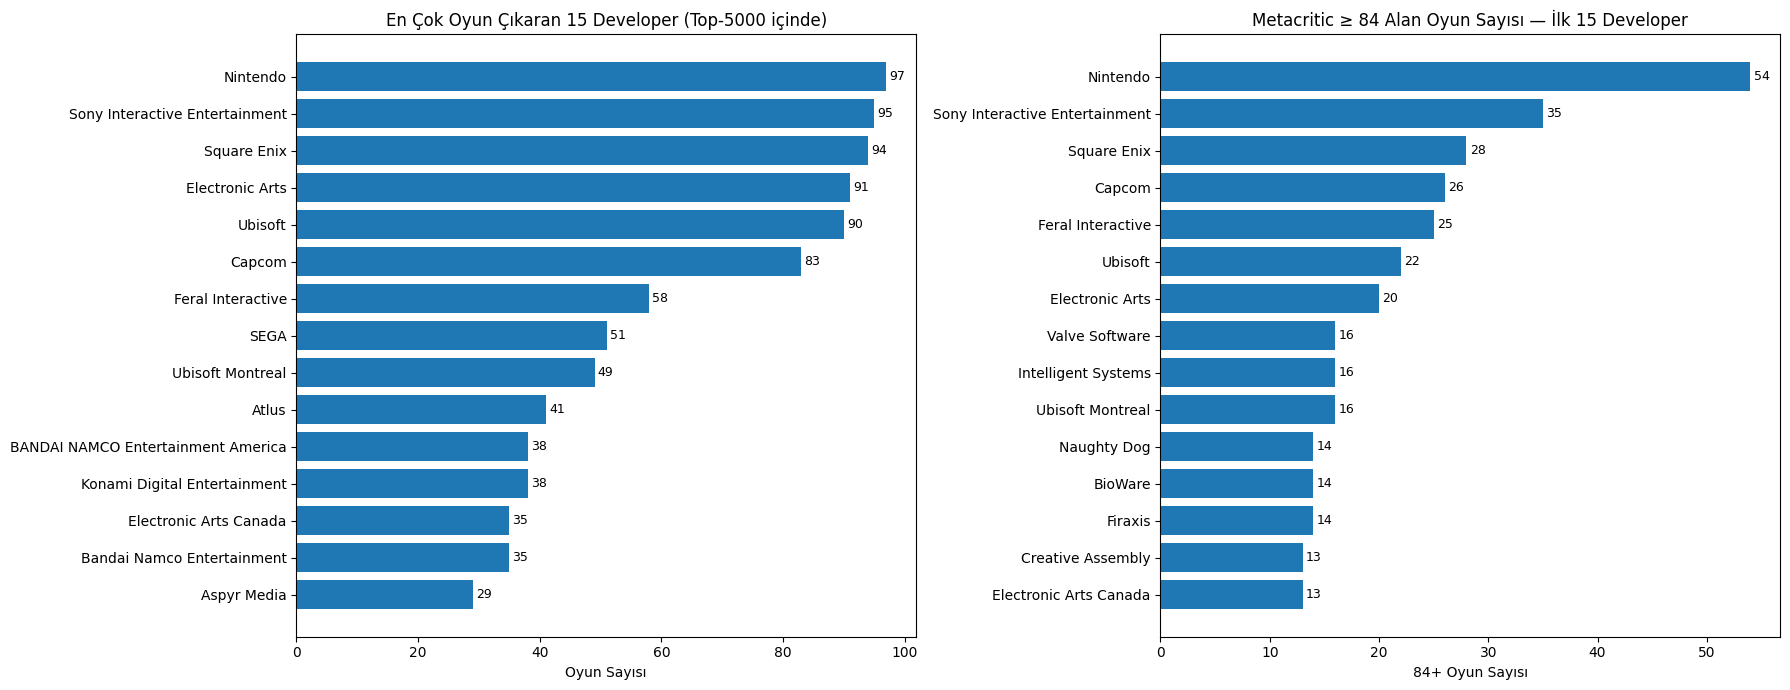

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

THRESH = 84

# 1) Developer'larƒ± explode ederek satƒ±rla≈ütƒ±r
rows = []
for _, row in df_final.dropna(subset=["developers", "metacritic_x"]).iterrows():
    for d in row["developers"].split(","):
        dev = d.strip()
        if dev:
            rows.append({"developer": dev, "metacritic": float(row["metacritic_x"])})

devdf = pd.DataFrame(rows)

# 2) Metrikler: toplam oyun sayƒ±sƒ±, 84+ sayƒ±sƒ±, 84+ oranƒ±
agg = (
    devdf
    .assign(ge84=lambda d: (d["metacritic"] >= THRESH).astype(int))
    .groupby("developer", as_index=False)
    .agg(n_total=("metacritic","size"),
         n_ge84=("ge84","sum"))
)
agg["rate_ge84"] = (agg["n_ge84"] / agg["n_total"] * 100).round(1)

# 3) G√∂rselle≈ütirme: Top 15 (rekabet & elit ba≈üarƒ±)
top_by_total = agg.sort_values("n_total", ascending=False).head(15)
top_by_ge84  = agg.sort_values("n_ge84",  ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sol: en √ßok oyun √ßƒ±karan 15 developer (rekabet yoƒüunluƒüu)
bars1 = axes[0].barh(top_by_total["developer"][::-1], top_by_total["n_total"][::-1])
axes[0].set_title("En √áok Oyun √áƒ±karan 15 Developer (Top-5000 i√ßinde)")
axes[0].set_xlabel("Oyun Sayƒ±sƒ±")
for b in bars1:
    axes[0].text(b.get_width()+0.5, b.get_y()+b.get_height()/2, int(b.get_width()), va="center", fontsize=9)

# Saƒü: 84+ sayƒ±sƒ±na g√∂re en g√º√ßl√º 15 developer (elit ba≈üarƒ±)
bars2 = axes[1].barh(top_by_ge84["developer"][::-1], top_by_ge84["n_ge84"][::-1])
axes[1].set_title(f"Metacritic ‚â• {THRESH} Alan Oyun Sayƒ±sƒ± ‚Äî ƒ∞lk 15 Developer")
axes[1].set_xlabel("84+ Oyun Sayƒ±sƒ±")
for b in bars2:
    axes[1].text(b.get_width()+0.3, b.get_y()+b.get_height()/2, int(b.get_width()), va="center", fontsize=9)

plt.tight_layout()
plt.show()

### Yorum ‚Äî Developer Rekabeti ve Zamanlama

Soldaki grafik, Top-5000 √∂rneklem i√ßinde **en √ßok oyun √ßƒ±karan** st√ºdyolarƒ± (genel √ºretim g√ºc√º) g√∂steriyor.  
Saƒüdaki grafik ise **Metacritic ‚â• 84** alan oyun **sayƒ±sƒ±na g√∂re** st√ºdyolarƒ± (√ºst d√ºzey ba≈üarƒ±) sƒ±ralƒ±yor.

**Okuma:**
- **Nintendo, Sony Interactive Entertainment, Square Enix** her iki listede de √ºst sƒ±ralarda. Bu st√ºdyolar hem **sƒ±k** √ºretim yapƒ±yor hem de **y√ºksek puanlƒ±** oyun √ßƒ±karma kapasitesine sahip.
- Bu nedenle **bu st√ºdyolarƒ±n b√ºy√ºk lansman d√∂nemleriyle aynƒ± zaman dilimine √ßƒ±kmak** oyunumuzun g√∂r√ºn√ºrl√ºƒü√ºn√º **olumsuz etkileyebilir**.  
  > Strateji: B√ºy√ºk Nintendo/Sony lansmanlarƒ±nƒ±n olmadƒ±ƒüƒ±, **nispeten sakin bir √ßƒ±kƒ±≈ü penceresi** hedeflemek mantƒ±klƒ±.

**Not:** Bu analiz Top-5000 (Metacritic‚Äôe g√∂re sƒ±ralƒ±) √∂rneklemi temel alƒ±r; pazarƒ±n tamamƒ±nƒ± deƒüil, **√ºst kalite kesitini** temsil eder. Yine de ‚Äúg√ºr√ºlt√ºs√ºz zamanlama‚Äù kararƒ± i√ßin g√º√ßl√º bir sinyal √ºretir.

**√áƒ±karƒ±m:** √úst segmentte yoƒüun rekabetin olduƒüu g√ºnlerde deƒüil, **daha sakin d√∂nemlerde √ßƒ±kƒ±≈ü** planlamak, 84+ hedefi olan bir oyun i√ßin g√∂r√ºn√ºrl√ºƒü√º ve basƒ±n/oyuncu ilgisini artƒ±rabilir.

**Future Analysis:**

Nintendo, Sony Interactive Entertainment, Square Enix her iki listede de √ºst sƒ±ralarda. Bu st√ºdyolar hem sƒ±k √ºretim yapƒ±yor hem de y√ºksek puanlƒ± oyun √ßƒ±karma kapasitesine sahip.

Nintendo‚Äônun √∂zel ba≈üarƒ±sƒ±: Sol grafikte Nintendo, toplam oyun √ºretimi a√ßƒ±sƒ±ndan rakipleriyle (Sony, Square Enix, EA, Ubisoft, Capcom) benzer seviyede olmasƒ±na raƒümen, saƒü grafikte 84+ oyun √ßƒ±karma sayƒ±sƒ±nda rakiplerini neredeyse 2‚Äôye katlƒ±yor.
Ayrƒ±ca Nintendo‚Äônun oyun tasarƒ±mƒ± ve geli≈ütirme yakla≈üƒ±mƒ± (√∂zellikle kaliteyi √∂ne √ßƒ±karan stratejisi) incelemeye deƒüer bir model sunuyor.

>üîÆ **Future Analysis Notu**: Nintendo‚Äônun 84+ bariyerini bu denli rahat ge√ßmesini saƒülayan fakt√∂rler ileride ayrƒ±ca incelenebilir. Bu inceleme sonucunda elde edilecek bulgular, yeni bir oyun geli≈ütirirken doƒürudan uygulanabilecek deƒüerli i√ßg√∂r√ºler saƒülayabilir.

## 3.5 ‚Äî ƒ∞lk 3 Developer‚Äôƒ±n Ay Bazƒ±nda 84+ √áƒ±kƒ±≈ü Yoƒüunluƒüu

Grafik, **Nintendo, Sony Interactive Entertainment ve Square Enix** i√ßin yƒ±llardan baƒüƒ±msƒ±z ≈üekilde **hangi aylarda 84+ oyun √ßƒ±kƒ±≈ülarƒ±nƒ±n yoƒüunla≈ütƒ±ƒüƒ±nƒ±** g√∂stermektedir.  

**√ñne √ßƒ±kan bulgular:**
- **Nintendo:** Kasƒ±m ayƒ±nda zirveye √ßƒ±kƒ±yor. Yƒ±l sonu tatil sezonu i√ßin yapƒ±lan g√º√ßl√º lansmanlar g√∂ze √ßarpƒ±yor. Ayrƒ±ca Temmuz ayƒ±nda da y√ºksek bir yoƒüunluk mevcut.  
- **Sony Interactive Entertainment:** En dengeli daƒüƒ±lƒ±ma sahip, √∂zellikle **Mart‚ÄìNisan** ve **Eyl√ºl‚ÄìKasƒ±m** d√∂nemlerinde √ßƒ±kƒ±≈ü yoƒüunluƒüu artƒ±yor.  
- **Square Enix:** Mart ve Temmuz aylarƒ±nda √∂ne √ßƒ±kƒ±yor. Yaz ortasƒ±nda √∂nemli lansmanlar yaptƒ±ƒüƒ± g√∂r√ºl√ºyor.  

**Stratejik √ßƒ±karƒ±m:**  
- Kasƒ±m ve Aralƒ±k aylarƒ± b√ºy√ºk firmalarƒ±n yoƒüun lansman d√∂nemleri olduƒüundan **rekabetin en y√ºksek olduƒüu zamanlar**.  
- Eƒüer k√º√ß√ºk/orta √∂l√ßekli bir oyun geli≈ütirilirse, **bu d√∂nemlerden ka√ßƒ±nmak** ve daha sakin d√∂nemleri (√∂r. Mayƒ±s, Haziran, Aƒüustos) hedeflemek daha avantajlƒ± olabilir.  

> üîÆ **Future Analysis Notu:** Bu analiz, sadece ‚Äúilk 3 developer‚Äù ile sƒ±nƒ±rlƒ±. Gelecekte diƒüer b√ºy√ºk st√ºdyolar (Ubisoft, Capcom, EA) da eklenerek daha geni≈ü bir **‚Äúzamanlama rekabet haritasƒ±‚Äù** √ßƒ±karƒ±labilir.

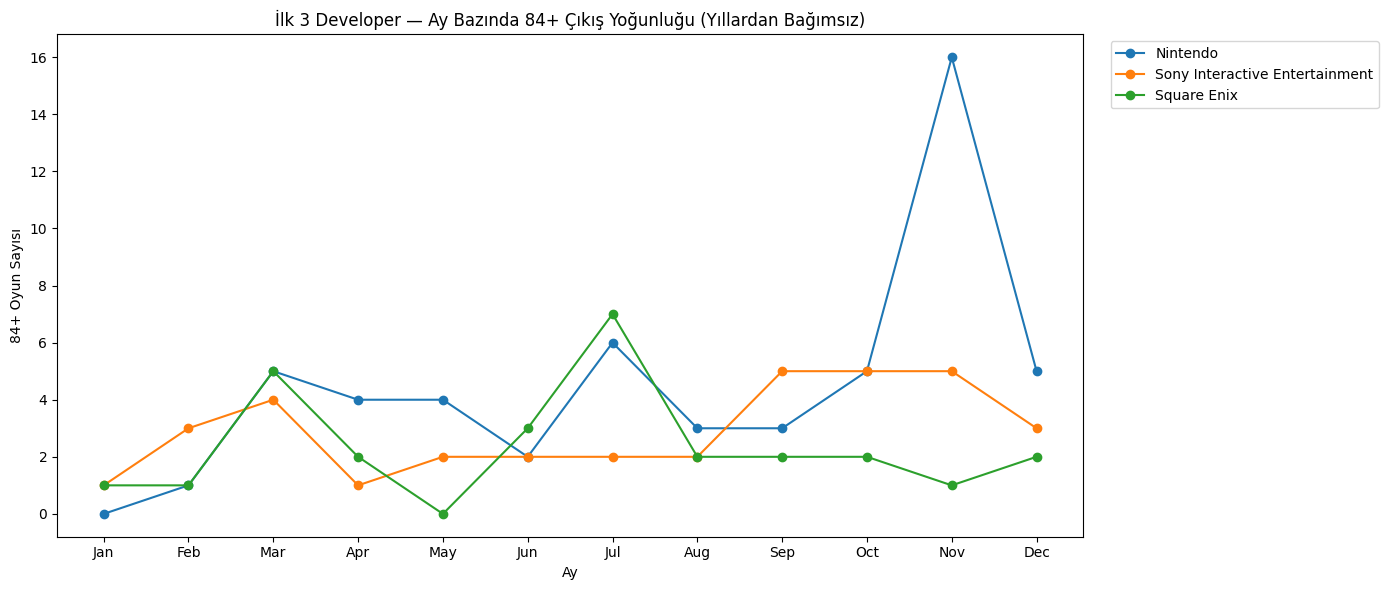

In [69]:
import calendar
import matplotlib.pyplot as plt

# Ay numarasƒ±nƒ± √ßƒ±kar
m = (df_top3
     .assign(month=lambda d: d["year_month"].dt.month)
     .groupby(["developer","month"]).size()
     .reset_index(name="count"))

fig, ax = plt.subplots(figsize=(14,6))
for dev in top3:
    s = m[m["developer"] == dev].set_index("month")["count"].reindex(range(1,13), fill_value=0)
    ax.plot(range(1,13), s.values, marker="o", label=dev)

ax.set_title("ƒ∞lk 3 Developer ‚Äî Ay Bazƒ±nda 84+ √áƒ±kƒ±≈ü Yoƒüunluƒüu (Yƒ±llardan Baƒüƒ±msƒ±z)")
ax.set_xlabel("Ay")
ax.set_ylabel("84+ Oyun Sayƒ±sƒ±")
ax.set_xticks(range(1,13))
ax.set_xticklabels(list(calendar.month_abbr)[1:])  # Jan, Feb, ...

ax.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

## 3.6 Publisher Analizi ‚Äî Partnerlik Fƒ±rsatlarƒ± (Hacim vs. 84+ Ba≈üarƒ±)

Indie bir geli≈ütirici i√ßin doƒüru **publisher** ile ortaklƒ±k; g√∂r√ºn√ºrl√ºk, platform ili≈ükileri ve pazarlama g√ºc√º a√ßƒ±sƒ±ndan kritik olabilir.  
Bu b√∂l√ºmde publisher‚Äôlarƒ± iki metrikle yan yana inceliyoruz:

- **Hacim (Top-5000 i√ßinde √ßƒ±kardƒ±klarƒ± oyun sayƒ±sƒ±)** ‚Üí aƒü geni≈üliƒüi / daƒüƒ±tƒ±m g√ºc√º
- **Ba≈üarƒ± (Metacritic ‚â• 84 alan oyun sayƒ±sƒ±)** ‚Üí √ºst d√ºzey kaliteyi pazara √ßƒ±karma kapasitesi

Ama√ß:  
- ‚Äú√áok oyun √ßƒ±karƒ±p 84+‚Äôƒ± d√º≈ü√ºk olan‚Äù publisher‚Äôlar ‚Üí **y√ºksek hacim, daha eri≈üilebilir partner** (ni≈ü ama fƒ±rsat).  
- ‚ÄúHem hacmi hem 84+‚Äôƒ± y√ºksek‚Äù publisher‚Äôlar ‚Üí **g√º√ßl√º ama rekabet√ßi partner**.  
- ‚ÄúHacmi d√º≈ü√ºk ama 84+‚Äôƒ± y√ºksek‚Äù publisher‚Äôlar ‚Üí **se√ßici, prestijli ni≈ü partner**.

> Not: Bu analiz Top-5000 (Metacritic‚Äôe g√∂re sƒ±ralƒ±) √∂rneklemi temel alƒ±r; pazarƒ±n tamamƒ±nƒ± deƒüil, √ºst kalite kesitini temsil eder.

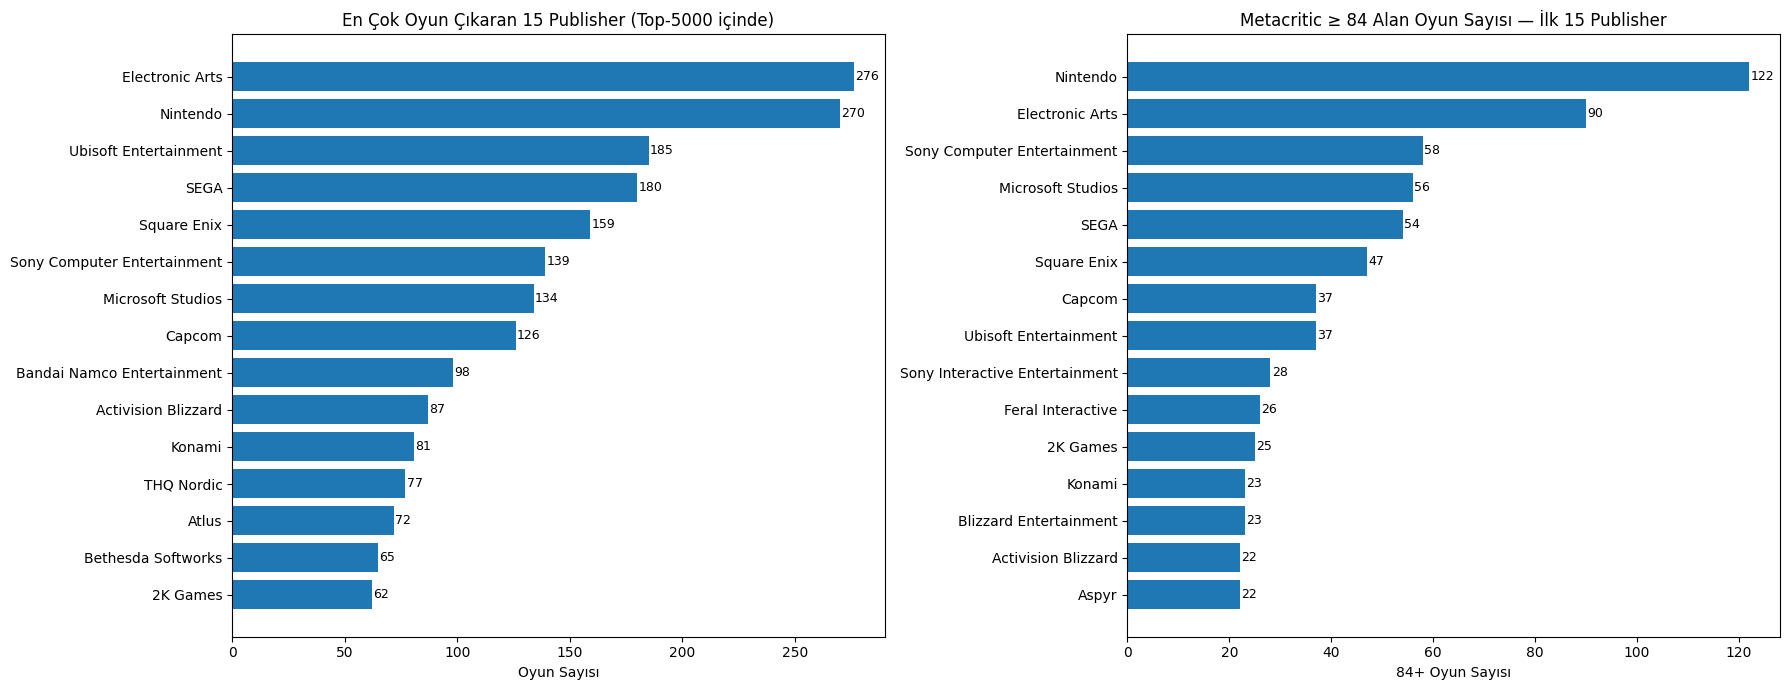

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

THRESH = 84

# 1) Publisher'larƒ± explode ederek tablo olu≈ütur
rows = []
src = df_final.dropna(subset=["publishers", "metacritic_x"])
for _, row in src.iterrows():
    score = float(row["metacritic_x"])
    for p in row["publishers"].split(","):
        pub = p.strip()
        if pub:
            rows.append({"publisher": pub, "metacritic": score})

pubdf = pd.DataFrame(rows)

# 2) Hacim (n_total), 84+ sayƒ±sƒ± (n_ge84), oran
agg_pub = (
    pubdf
    .assign(ge84=lambda d: (d["metacritic"] >= THRESH).astype(int))
    .groupby("publisher", as_index=False)
    .agg(n_total=("metacritic", "size"),
         n_ge84=("ge84", "sum"))
)
agg_pub["rate_ge84"] = (agg_pub["n_ge84"] / agg_pub["n_total"] * 100).round(1)

# 3) G√∂rselle≈ütirme ‚Äî Top 15 (hacim ve 84+ sayƒ±sƒ±)
top_total = agg_pub.sort_values("n_total", ascending=False).head(15)
top_ge84  = agg_pub.sort_values("n_ge84",  ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sol: En √ßok oyun √ßƒ±karan 15 publisher
bars1 = axes[0].barh(top_total["publisher"][::-1], top_total["n_total"][::-1])
axes[0].set_title("En √áok Oyun √áƒ±karan 15 Publisher (Top-5000 i√ßinde)")
axes[0].set_xlabel("Oyun Sayƒ±sƒ±")
for b in bars1:
    axes[0].text(b.get_width()+0.5, b.get_y()+b.get_height()/2,
                 int(b.get_width()), va="center", fontsize=9)

# Saƒü: Metacritic ‚â• 84 alan oyun sayƒ±sƒ±na g√∂re 15 publisher
bars2 = axes[1].barh(top_ge84["publisher"][::-1], top_ge84["n_ge84"][::-1])
axes[1].set_title(f"Metacritic ‚â• {THRESH} Alan Oyun Sayƒ±sƒ± ‚Äî ƒ∞lk 15 Publisher")
axes[1].set_xlabel("84+ Oyun Sayƒ±sƒ±")
for b in bars2:
    axes[1].text(b.get_width()+0.3, b.get_y()+b.get_height()/2,
                 int(b.get_width()), va="center", fontsize=9)

plt.tight_layout()
plt.show()


In [124]:
# Publisher bazƒ±nda toplam oyun ve 84+ oyun sayƒ±sƒ± + oran
pub_stats = (
    df_final.groupby("publishers")
    .agg(
        total_games=("rawg_id", "count"),
        high84_games=("rawg_id", lambda idx: (df_final.loc[idx.index, "metacritic_x"] >= 84).sum())
    )
    .reset_index()
)

# Oran (%)
pub_stats["high84_ratio"] = (pub_stats["high84_games"] / pub_stats["total_games"] * 100).round(1)

# En √ßok oyun √ßƒ±karan 15 publisher
top15_publishers = (
    pub_stats.sort_values("total_games", ascending=False)
    .head(15)
    .reset_index(drop=True)
)

# --- 40 barajƒ±na g√∂re renklendirme ---
def highlight_groups_40(row):
    # üü• Y√ºksek hacim & d√º≈ü√ºk ba≈üarƒ±
    if row["total_games"] > 100 and row["high84_ratio"] < 40:
        return ["background-color: #fdd"] * len(row)      # kƒ±rmƒ±zƒ±msƒ±
    # üü© Y√ºksek hacim & y√ºksek ba≈üarƒ±
    elif row["total_games"] > 100 and row["high84_ratio"] >= 40:
        return ["background-color: #dfd"] * len(row)      # ye≈üilimsi
    # üü¶ D√º≈ü√ºk hacim & y√ºksek ba≈üarƒ±
    elif row["total_games"] <= 100 and row["high84_ratio"] >= 40:
        return ["background-color: #ddf"] * len(row)      # mavimsi
    # ‚ö™ D√º≈ü√ºk hacim & d√º≈ü√ºk ba≈üarƒ±
    else:
        return ["background-color: #eee"] * len(row)      # gri

styled = top15_publishers.style.apply(highlight_groups_40, axis=1)
styled


### Yorum ‚Äî Publisher Analizi (40% Ba≈üarƒ± Barajƒ± ile)

Tablo, **publisher‚Äôlarƒ±n √ßƒ±kardƒ±klarƒ± toplam oyun sayƒ±sƒ±**, bunlardan **ka√ßƒ±nƒ±n Metacritic ‚â• 84 aldƒ±ƒüƒ±** ve oranlarƒ±nƒ± g√∂stermektedir.  
Renkler √º√ß farklƒ± stratejik grubu ifade etmektedir:  

- üü© **Y√ºksek hacim & y√ºksek ba≈üarƒ±**  
  - √ñrnek: **Nintendo (46.8%)**, **Sony Computer Entertainment (42.6%)**  
  - √áok sayƒ±da oyun √ßƒ±karƒ±p aynƒ± zamanda y√ºksek ba≈üarƒ± oranƒ±na ula≈üabiliyorlar.  
  - Bu firmalarla partnerlik yapmak **prestijli ama zorlayƒ±cƒ±** olabilir; rekabet y√ºksek, kabul s√ºre√ßleri se√ßici.  

- üü• **Y√ºksek hacim & d√º≈ü√ºk ba≈üarƒ±**  
  - √ñrnek: **Electronic Arts (30.4%)**, **Ubisoft (20.4%)**, **SEGA (24.8%)**, **Capcom (28.8%)**, **Square Enix (28.7%)**  
  - √áok sayƒ±da oyun √ßƒ±karƒ±yorlar ancak 84+ oranƒ± g√∂rece d√º≈ü√ºk.  
  - Indie geli≈ütiriciler i√ßin **eri≈üilebilir partnerlik fƒ±rsatlarƒ±** sunabilir; oyun kalabalƒ±k havuzda kaybolma riski ta≈üƒ±yabilir ama yayƒ±ncƒ± desteƒüi daha ula≈üƒ±labilir.  

- üü¶ **D√º≈ü√ºk hacim & y√ºksek ba≈üarƒ±**  
  - √ñrnek: **Microsoft Studios (42.4%)**  
  - Daha az oyun √ßƒ±karƒ±yorlar ancak ba≈üarƒ± oranƒ± y√ºksek.  
  - Partnerlik daha **ni≈ü ve se√ßici**, fakat **y√ºksek prestij** potansiyeli ta≈üƒ±yor.  

- ‚ö™ **D√º≈ü√ºk hacim & d√º≈ü√ºk ba≈üarƒ±**  
  - √ñrnek: **Bandai Namco Entertainment, Atlus, Devolver Digital, Warner Bros. Interactive**  
  - Oran da hacim de d√º≈ü√ºk.  
  - Partnerlik halinde b√ºy√ºk bir prestij saƒülamaz ama belirli ni≈ü pazarlarda faydalƒ± olabilir.  

---

### √áƒ±karƒ±m ‚Äî Indie Geli≈ütirici i√ßin Partnerlik
- Eƒüer **y√ºksek g√∂r√ºn√ºrl√ºk ve prestij** hedefleniyorsa ‚Üí üü© grubundaki publisher‚Äôlar tercih edilmeli.  
- Eƒüer **eri≈üilebilirlik ve hƒ±zlƒ± partnerlik** √∂ncelikliyse ‚Üí üü• grubundaki publisher‚Äôlar daha mantƒ±klƒ± olabilir.  
- Uzun vadede ise üü¶ grubundaki az ama ba≈üarƒ±lƒ± publisher‚Äôlar, **kalite odaklƒ± √ßƒ±kƒ±≈ü** i√ßin kritik fƒ±rsatlar sunabilir.  

üëâ Bu analiz, indie geli≈ütiricinin **hangi publisher tipi ile i≈ü birliƒüi yapmasƒ±nƒ±n stratejik olarak uygun olacaƒüƒ±nƒ±** netle≈ütirmeyi ama√ßlƒ±yor.  

## 3.7. Store Analizi ‚Äî Oyunlarƒ±n √áƒ±kƒ±≈ü Yaptƒ±ƒüƒ± Platformlar

Publisher analizinden sonra ≈üimdi odaƒüƒ±mƒ±zƒ± **oyunlarƒ±n hangi dijital maƒüazalarda (store) yayƒ±nlandƒ±ƒüƒ±na** √ßeviriyoruz.  
Amacƒ±mƒ±z, indie bir geli≈ütirici olarak oyunumuzu √ßƒ±karmak i√ßin **en doƒüru maƒüaza partnerini** se√ßmek.

### Analiz Adƒ±mlarƒ±:
1. Her store‚Äôda toplam ka√ß oyun yayƒ±nlanmƒ±≈ü?  
2. Bu oyunlardan ka√ß tanesi **Metacritic ‚â• 84** barajƒ±nƒ± a≈ümƒ±≈ü?  
3. Oranlarƒ± kar≈üƒ±la≈ütƒ±rarak hangi store‚Äôlarƒ±n **prestijli ama zorlayƒ±cƒ±**, hangilerinin **eri≈üilebilir ama rekabet√ßi** olduƒüunu belirlemek.  

Bu analiz, indie bir oyun i√ßin doƒüru maƒüaza se√ßimi stratejisine ƒ±≈üƒ±k tutacaktƒ±r.


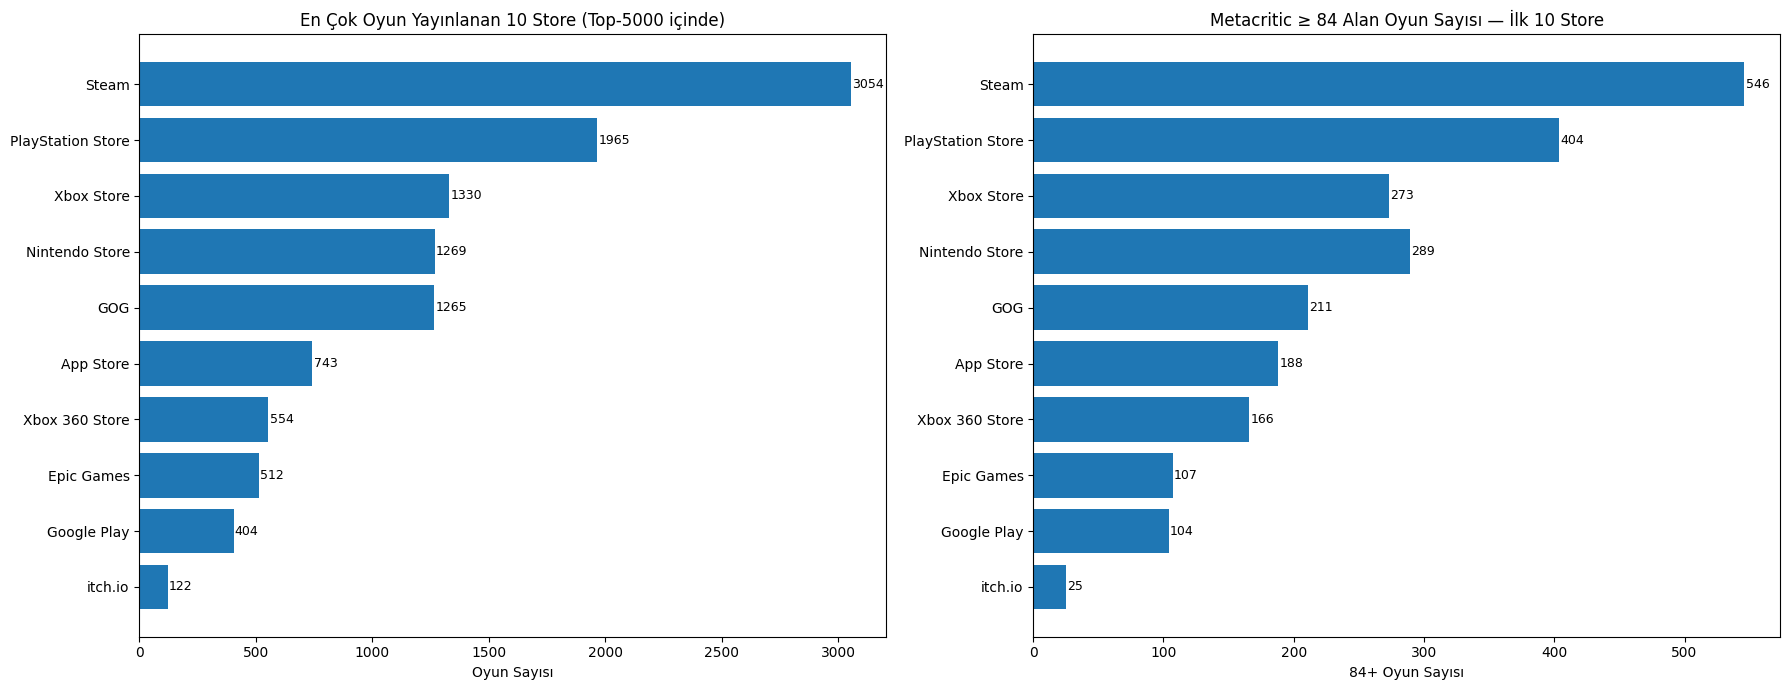

In [85]:
import matplotlib.pyplot as plt

# ƒ∞lk 10 store (hacme g√∂re)
top_stores = df_store_stats.head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sol grafik ‚Äî toplam oyun sayƒ±sƒ±
bars1 = axes[0].barh(top_stores["store"][::-1], top_stores["total_games"][::-1])
axes[0].set_title("En √áok Oyun Yayƒ±nlanan 10 Store (Top-5000 i√ßinde)")
axes[0].set_xlabel("Oyun Sayƒ±sƒ±")
for b in bars1:
    axes[0].text(b.get_width()+5, b.get_y()+b.get_height()/2,
                 int(b.get_width()), va="center", fontsize=9)

# Saƒü grafik ‚Äî 84+ oyun sayƒ±sƒ±
bars2 = axes[1].barh(top_stores["store"][::-1], top_stores["high84_games"][::-1])
axes[1].set_title("Metacritic ‚â• 84 Alan Oyun Sayƒ±sƒ± ‚Äî ƒ∞lk 10 Store")
axes[1].set_xlabel("84+ Oyun Sayƒ±sƒ±")
for b in bars2:
    axes[1].text(b.get_width()+1, b.get_y()+b.get_height()/2,
                 int(b.get_width()), va="center", fontsize=9)

plt.tight_layout()
plt.show()


In [125]:
from collections import Counter
import pandas as pd

# --- Mapping: farklƒ± isimleri ortak gruba √ßevir ---
store_mapping = {
    "Xbox 360 Store": "Xbox Store",
    "Xbox One Store": "Xbox Store",
    "Xbox Series S/X Store": "Xbox Store",
    "PlayStation 3 Store": "PlayStation Store",
    "PlayStation 4 Store": "PlayStation Store",
    "PlayStation 5 Store": "PlayStation Store"
}

def normalize_store(name):
    return store_mapping.get(name, name)

# --- 1) T√ºm oyunlarda store sayƒ±larƒ± ---
all_stores = []
for s in df_final["stores"].dropna():
    for st in s.split(","):
        all_stores.append(normalize_store(st.strip()))

store_counts_all = Counter(all_stores)
df_stores_all = pd.DataFrame(store_counts_all.items(), columns=["store", "total_games"])

# --- 2) Sadece 84+ oyunlar ---
all_stores_84 = []
for s in df_final.loc[df_final["metacritic_x"] >= 84, "stores"].dropna():
    for st in s.split(","):
        all_stores_84.append(normalize_store(st.strip()))

store_counts_84 = Counter(all_stores_84)
df_stores_84 = pd.DataFrame(store_counts_84.items(), columns=["store", "high84_games"])

# --- 3) Birle≈ütir ve oran hesapla ---
df_store_stats = (
    df_stores_all.merge(df_stores_84, on="store", how="left")
    .fillna(0)
    .assign(
        high84_games=lambda d: d["high84_games"].astype(int),
        high84_ratio=lambda d: (d["high84_games"] / d["total_games"] * 100).round(1)
    )
    .sort_values("total_games", ascending=False)
    .reset_index(drop=True)
)

# --- 4) ƒ∞lk 10 store'u tablo olarak g√∂ster ---
top10_stores = df_store_stats.head(10).reset_index(drop=True)
top10_stores

store  total_games  high84_games  high84_ratio
0              Steam         3054           546          17.9
1  PlayStation Store         1965           404          20.6
2         Xbox Store         1884           439          23.3
3     Nintendo Store         1269           289          22.8
4                GOG         1265           211          16.7
5          App Store          743           188          25.3
6         Epic Games          512           107          20.9
7        Google Play          404           104          25.7
8            itch.io          122            25          20.5

### Yorum ‚Äî Store Se√ßimi ve Portlama Stratejisi  

**Tablodan √∂ne √ßƒ±kanlar:**  
- **Steam (3054 oyun, %17.9)**: En geni≈ü oyun k√ºt√ºphanesine sahip, indie oyunlarƒ±n ilk √ßƒ±kƒ±≈ü noktasƒ±. Ancak 84+ oranƒ± g√∂rece d√º≈ü√ºk; kalabalƒ±k ortamda kaybolma riski y√ºksek.  
- **PlayStation Store (1965 oyun, %20.6)**: Daha se√ßici bir ortam, kalite oranƒ± Steam‚Äôden daha iyi. Ancak portlama i≈ü y√ºk√º y√ºksek, sertifikasyon s√ºre√ßleri uzun.  
- **Xbox Store (1884 oyun, %23.3)**: 84+ oranƒ± g√º√ßl√º, √∂zellikle Game Pass entegrasyonu g√∂r√ºn√ºrl√ºk saƒülar. Portlama i≈ü y√ºk√º PlayStation‚Äôa benzer ama partnerlik fƒ±rsatlarƒ± daha esnek.  
- **Nintendo Store (1269 oyun, %22.8)**: √ñzellikle indie platformer/metroidvania t√ºrleri i√ßin en uygun pazar. 84+ oranƒ± y√ºksek, kitlesi sadƒ±k. Portlama orta zorlukta ama getirisi t√ºr uyumuna g√∂re √ßok y√ºksek.  
- **GOG (1265 oyun, %16.7)**: DRM‚Äôsiz yapƒ±sƒ± ve sadƒ±k PC oyuncusu kitlesi var. Ancak 84+ oranƒ± d√º≈ü√ºk, satƒ±≈ü hacmi sƒ±nƒ±rlƒ±.  
- **App Store & Google Play (%25 civarƒ±)**: Y√ºksek kalite oranƒ± g√∂ze √ßarpƒ±yor, fakat tamamen farklƒ± i≈ü modeli (F2P, mikro √∂demeler). Oyunun t√ºr√ºne g√∂re uygun olmayabilir.  
- **Epic Games (%20.9)**: Daha k√º√ß√ºk k√ºt√ºphane ama d√º≈ü√ºk komisyon (%12). √ñzellikle indie i√ßin cazip. G√∂r√ºn√ºrl√ºk fƒ±rsatƒ± Epic anla≈ümalarƒ±na baƒülƒ±.  
- **itch.io (%20.5)**: En d√º≈ü√ºk oyun sayƒ±sƒ±na sahip. Gelir k√º√ß√ºk ama geli≈ütirici √∂zg√ºrl√ºƒü√º y√ºksek; topluluk bazlƒ± test i√ßin uygun.  

---

### √áƒ±karƒ±m  
- **Ba≈ülangƒ±√ß noktasƒ± (low risk, high reach):** Steam + Epic Games ‚Üí d√º≈ü√ºk i≈ü y√ºk√º, geni≈ü eri≈üim.  
- **ƒ∞kinci dalga (prestij + t√ºr uyumu):** Nintendo Store ‚Üí metroidvania/platformer gibi t√ºrlerde stratejik avantaj.  
- **Stratejik partnerlik:** Xbox Store (Game Pass anla≈ümalarƒ±) ‚Üí y√ºksek g√∂r√ºn√ºrl√ºk saƒülar.  
- **Uzun vadeli hedef:** PlayStation Store ‚Üí prestijli ama y√ºksek portlama maliyeti nedeniyle publisher desteƒüi ile d√º≈ü√ºn√ºlmeli.  

---

üìå **√ñzet:**  
ƒ∞≈ü y√ºk√º / getiriyi dengelemek i√ßin, **√∂nce PC (Steam/Epic)** √ßƒ±kƒ±≈üƒ± ‚Üí sonra **Nintendo veya Xbox** ‚Üí en son **PlayStation (publisher partnerliƒüiyle)** doƒüru sƒ±ralama olacaktƒ±r.  


## Sonu√ß ve √ñneriler (√ñzet)

**Veri kaynaƒüƒ±:** RAWG API ‚Äì 5.000 oyun (en y√ºksek Metacritic sƒ±ralƒ±).  
**Filtre / hedef:** 84+ puan barajƒ± (√ºst segment kalite sinyali).

### 1) Zaman Dinamikleri
- Ortalama Metacritic zaman serisi pandemi sonrasƒ± (2020‚Üí) toparlanma g√∂sterdi, ancak **84+ oyun sayƒ±sƒ± 2016‚Äì2017 zirvesinden sonra azaldƒ±.**
- Yorum: Pazarda **√ºst segment yoƒüunluk azalmƒ±≈ü**, bu da kaliteli bir oyunun daha g√∂r√ºn√ºr olmasƒ±na fƒ±rsat tanƒ±yor.

### 2) T√ºrler (Kalite vs ƒ∞lgi)
- **Kalite (84+ oranƒ± / ortalama puan):** **Card, Platformer, Shooter** √ºst sƒ±ralarda.
- **ƒ∞lgi (ratings_count & added medyanƒ±):** **Shooter** ve **Massively Multiplayer** √ßok y√ºksek; **Card** da √ºstte.
- **Denge:** **Shooter** hem kalite hem ilgi tarafƒ±nda g√º√ßl√º; **Platformer** kaliteli ama ilgi daha d√º≈ü√ºk; **Card** iki tarafta da iyi.
- √ñneri: Kaynak kƒ±sƒ±tlƒ±ysa **Shooter (veya Card)** odaƒüƒ±; daha ni≈ü ama prestij hedefliyorsak **Platformer**.

### 3) Developer Rekabeti
- Top √ºretken st√ºdyolar ile 84+ √ßƒ±karanlar ayrƒ±≈üƒ±yor.  
- **Nintendo** hem hacim hem 84+‚Äôta zirvede ‚Üí aynƒ± tarihlere **√ßƒ±kƒ±≈ü √ßakƒ±≈ümasƒ±ndan ka√ßƒ±n**.  
- Gelecek √ßalƒ±≈üma (opsiyonel): Nintendo‚Äônun pattern‚Äôleri (takvim/pazarlama/seri y√∂netimi) incelenip best practice √ßƒ±karƒ±mƒ±.

### 4) Publisher Deƒüerlendirmesi (40% barajƒ±yla segmentasyon)
- **Y√ºksek hacim + y√ºksek ba≈üarƒ± (ye≈üil):** Nintendo, Sony Computer Entertainment vb. ‚Üí **g√º√ßl√º ama rekabet√ßi partner**.
- **Y√ºksek hacim + daha d√º≈ü√ºk ba≈üarƒ± (kƒ±rmƒ±zƒ±):** Ubisoft Ent., SEGA, Capcom vb. ‚Üí **eri≈üilebilirlik daha y√ºksek**; doƒüru proje ile √∂ne √ßƒ±kma ≈üansƒ±.
- **D√º≈ü√ºk hacim + y√ºksek ba≈üarƒ± (mavi):** Microsoft Studios vb. ‚Üí **se√ßici, prestijli ni≈ü partner**.

### 5) Store Stratejisi (portlama i≈ü y√ºk√º dahil)
- **Ba≈ülangƒ±√ß (low risk / high reach):** **Steam + Epic** (Epic‚Äôin %12 komisyon avantajƒ±).  
- **ƒ∞kinci dalga (prestij + t√ºr uyumu):** **Nintendo eShop** (√∂zellikle platformer/metroidvania) veya **Xbox (Game Pass)**.  
- **Uzun vadeli hedef:** **PlayStation Store** (y√ºksek sertifikasyon/i≈ü y√ºk√º ‚Üí publisher partnerliƒüi ile).  
- Verisetinde 84+ oranlarƒ±: Steam %17.9, PS %20.6, Xbox %23.3, Nintendo %22.8, Epic %20.9.

### 6) Takvim ve √áƒ±kƒ±≈ü
- Rekabetten ka√ßƒ±nmak i√ßin **Nintendo / Sony b√ºy√ºk lansman d√∂nemlerinden ka√ßƒ±n** (√∂nceki grafikteki yoƒüun aylara bak).  
- 84+ hedefi i√ßin **QA / playtest / demo (Steam Next Fest)** planƒ± kritik.

---

## Yol Haritasƒ± (yapƒ±labilir adƒ±mlar)
1. **T√ºr kararƒ±:** Shooter ‚Üî Card (alternatif: prestij i√ßin Platformer).  
2. **Hedef metrik:** Metacritic **84+** ‚Üí tasarƒ±m/QA b√ºt√ßesi ve milestone‚Äôlarƒ± buna g√∂re ayarla.  
3. **√áƒ±kƒ±≈ü sƒ±rasƒ±:** Steam ‚Üí Epic ‚Üí (uygunsa) Nintendo / Xbox ‚Üí PlayStation (publisher ile).  
4. **Zamanlama:** B√ºy√ºk Nintendo/Sony pencerelerinden ka√ßƒ±n; demo + wishlists kampanyasƒ±.  
5. **Publisher g√∂r√º≈ümeleri:** Segment tablomuza g√∂re 2‚Äì3 aday listele, vertical fit + referans case iste.  
6. **Ek analiz (opsiyonel):** Se√ßilen t√ºr i√ßin **store bazlƒ± performans** (√∂r. Shooter‚Äôƒ±n Switch/PS/Xbox/PC daƒüƒ±lƒ±mƒ±) ve **fiyatlandƒ±rma/indirim etkisi**.

### Sƒ±nƒ±rlamalar
- √ñrneklem top-5000 (Metacritic‚Äôe g√∂re) ‚Üí pazarƒ±n tamamƒ±nƒ± temsil etmeyebilir.  
- RAWG ‚Äúgenres‚Äù alanƒ± heterojen (√∂r. ‚ÄúIndie‚Äù hari√ß tutularak d√ºzeltildi).  
- 2024‚Äì2025 verileri **erken yƒ±l etkisi** nedeniyle eksik olabilir.

**Kƒ±sa √∂zet:**  
Kaliteyi (84+) hedefleyen ve pop√ºlerlik potansiyeli y√ºksek, **Shooter/Card** gibi bir t√ºrle; **Steam/Epic** √ßƒ±kƒ±≈üƒ± + **Nintendo/Xbox** ikinci dalga; **PlayStation** publisher‚Äôla. B√ºy√ºk st√ºdyo lansmanlarƒ±ndan ka√ßƒ±narak, demo/wishlist stratejisiyle g√∂r√ºn√ºrl√ºƒü√º artƒ±r.


---

## üéÆ Meraklƒ±sƒ±na ‚Äî Unutulmazlar

Her raporun sonunda, oyun d√ºnyasƒ±nƒ±n ‚Äúzamansƒ±z klasikleri‚Äùne de bir selam olsun.  
A≈üaƒüƒ±da **Metacritic puanƒ± 95+ olan oyunlar** listelenmi≈ütir.  

Bu b√∂l√ºm analizin bir par√ßasƒ± olmaktan ziyade, **oyun tutkusunu hatƒ±rlatmak i√ßin** eklenmi≈ütir.  
√á√ºnk√º rakamlar ve istatistikler yolumuzu aydƒ±nlatsa da, **oyun geli≈ütirme en nihayetinde bir tutku i≈üidir.**

---


In [99]:
# 95+ oyunlarƒ± filtrele
top95_games = df_final[df_final["metacritic_x"] >= 95]

# ƒ∞lgili kolonlarƒ± se√ß ve sƒ±ralamayƒ± puana g√∂re yap
top95_games = top95_games[["released", "name", "developers", "publishers", "metacritic_x"]] \
    .sort_values("metacritic_x", ascending=False)

# Yƒ±lƒ± ayrƒ± bir kolon olarak ekle
top95_games["year"] = top95_games["released"].dt.year

# Kolonlarƒ± yeniden sƒ±rala
top95_games = top95_games[["year", "name", "developers", "publishers", "metacritic_x"]]

# Sonu√ßlarƒ± g√∂ster
top95_games


year                                       name  \
0   1998       The Legend of Zelda: Ocarina of Time   
1   1998                         Soulcalibur (1998)   
2   1998                                Soulcalibur   
3   2023                          Baldur's Gate III   
4   2002                              Metroid Prime   
5   2000                               Perfect Dark   
6   2017                        Super Mario Odyssey   
7   2010                       Super Mario Galaxy 2   
8   2007                         Super Mario Galaxy   
9   2017    The Legend of Zelda: Breath of the Wild   
10  2015                        Half-Life 2: Update   
11  2023  The Legend of Zelda: Tears of the Kingdom   
12  1997                                   Tekken 3   
13  1997                       GoldenEye 007 (1997)   
14  1997                               Gran Turismo   
15  2001        Metal Gear Solid 2: Sons of Liberty   
16  2009                 Uncharted 2: Among Thieves   
17  1998                                  Half-Life   
18  2004                                Half-Life 2   
19  2007                                   BioShock   
20  2018                      Red Dead Redemption 2   
21  2010      Grand Theft Auto IV: Complete Edition   
22  2003   The Legend of Zelda: Collector's Edition   
23  2022                                 Elden Ring   
24  2017                  XCOM 2: War of the Chosen   
25  2000           Baldur's Gate II: Shadows of Amn   
26  2000         The Legend of Zelda: Majora's Mask   
27  1991    The Legend of Zelda: A Link to the Past   
28  2017                   Divinity: Original Sin 2   
29  2010                        Red Dead Redemption   
30  2008                        Grand Theft Auto IV   
31  2011                                   Portal 2   
32  2013                             The Last Of Us   
33  2014                  The Last Of Us Remastered   
34  2008                            LittleBigPlanet   

                                           developers  \
0                                            Nintendo   
1                                                None   
2   BANDAI NAMCO Entertainment America, NAMCO, Pro...   
3                                      Larian Studios   
4                                       Retro Studios   
5                                    Rare, 4J Studios   
6                                            Nintendo   
7                                            Nintendo   
8                                            Nintendo   
9                                            Nintendo   
10                                     Valve Software   
11                                           Nintendo   
12                                              NAMCO   
13                                               Rare   
14  Sony Interactive Entertainment, Polys Entertai...   
15                Konami Computer Entertainment Japan   
16                                        Naughty Dog   
17                   Valve Software, Gearbox Software   
18          Valve Software, NVIDIA Lightspeed Studios   
19  Digital Extremes, 2K Australia, 2K Marin, Irra...   
20                                     Rockstar Games   
21                                   Rockstar Toronto   
22                                           Nintendo   
23                                       FromSoftware   
24                                            Firaxis   
25            BioWare, Black Isle Studios, MumboJumbo   
26                                           Nintendo   
27                                           Nintendo   
28                                     Larian Studios   
29  Rockstar North, Rockstar Games, Double Eleven,...   
30                                     Rockstar North   
31                                     Valve Software   
32                                        Naughty Dog   
33                                        Naughty Dog   
34  Sony Interactive Enterta